In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/Coupang-reviews-homeplanet/review_data_complete_text.csv')
df.head()

,상품명,구매상품명,작성일자,구매자명,평점,헤드라인,리뷰내용,도움수,이미지수
0,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개",2025.06.03,정*날,5,잘 작동합니다.,잘 작동합니다.,0,0
1,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개",2025.06.03,이*민,4,♡Pulio 충전기로 쓰시려는 분들은 보세요♡,⚡️⚡️⚡️⚡️풀리오 동시충전 안됩니다⚡️⚡️⚡️⚡️풀리오 발마사지기 5V 2A 충...,0,0
2,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 2개",2025.06.02,박*혜,5,충전용으로 구매,다이소에서 조명을 샀는데저속충전 제품이 필요해 구매했어요충전기는 다이소보다 쿠팡이 ...,0,0
3,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 2개",2025.06.01,고*석,5,"작지만 든든한 2포트 충전기, 집·사무실 필수템!",후기 제목: 작지만 실속 있는 듀얼 충전기! 집안 곳곳에 두기 딱 좋아요집에서 자주...,0,0
4,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 2개",2025.06.01,고*석,5,두 기기 동시에 OK! 작지만 실속 있는 듀얼 USB,후기 제목: 간편한 듀얼 충전! 작지만 실속 있는 홈플래닛 USB 충전기여러 기기 ...,0,0


In [3]:
# 헤드라인과 리뷰내용의 존재 여부를 원-핫 인코딩으로 표현
df['헤드라인_존재'] = df['헤드라인'].notna().astype(int)
df['리뷰내용_존재'] = df['리뷰내용'].notna().astype(int)

# 결과 확인
print("원-핫 인코딩 결과:")
print(df[['헤드라인', '리뷰내용', '헤드라인_존재', '리뷰내용_존재']].head())

# 각 패턴 분포 확인
pattern_counts = df.groupby(['헤드라인_존재', '리뷰내용_존재']).size().reset_index(name='개수')
pattern_counts['패턴'] = pattern_counts.apply(
    lambda x: f"헤드라인{'O' if x['헤드라인_존재']==1 else 'X'}-리뷰내용{'O' if x['리뷰내용_존재']==1 else 'X'}",
    axis=1
)
print("\n패턴별 분포:")
print(pattern_counts[['패턴', '개수']])

원-핫 인코딩 결과:
                            헤드라인  \
0                       잘 작동합니다.   
1      ♡Pulio 충전기로 쓰시려는 분들은 보세요♡   
2                       충전용으로 구매   
3    작지만 든든한 2포트 충전기, 집·사무실 필수템!   
4  두 기기 동시에 OK! 작지만 실속 있는 듀얼 USB   

                                                리뷰내용  헤드라인_존재  리뷰내용_존재  
0                                           잘 작동합니다.        1        1  
1  ⚡️⚡️⚡️⚡️풀리오 동시충전 안됩니다⚡️⚡️⚡️⚡️풀리오 발마사지기 5V 2A 충...        1        1  
2  다이소에서 조명을 샀는데저속충전 제품이 필요해 구매했어요충전기는 다이소보다 쿠팡이 ...        1        1  
3  후기 제목: 작지만 실속 있는 듀얼 충전기! 집안 곳곳에 두기 딱 좋아요집에서 자주...        1        1  
4  후기 제목: 간편한 듀얼 충전! 작지만 실속 있는 홈플래닛 USB 충전기여러 기기 ...        1        1  

패턴별 분포:
            패턴     개수
0  헤드라인X-리뷰내용O  29544
1  헤드라인O-리뷰내용X   2595
2  헤드라인O-리뷰내용O  68443


In [4]:
# 헤드라인과 리뷰내용을 하나로 합치는 작업
df['full_text'] = df['헤드라인'].fillna('') + ' ' + df['리뷰내용'].fillna('')

In [5]:
# 텍스트의 길이를 feature로 추출
df['full_text_length'] = df['full_text'].str.len()

In [6]:
!pip install emoji --quiet

In [7]:
import emoji

# 이모티콘 개수를 세는 함수 > 하나의 feature로 추출
def count_emojis(text):
    if not isinstance(text, str):
        return 0
    return sum(1 for c in text if c in emoji.EMOJI_DATA)

# 이모티콘 개수 컬럼 추가
df['emoticon_count'] = df['full_text'].apply(count_emojis)

# 결과 확인
df[['full_text', 'emoticon_count']].head(10)

,full_text,emoticon_count
0,잘 작동합니다. 잘 작동합니다.,0
1,♡Pulio 충전기로 쓰시려는 분들은 보세요♡ ⚡️⚡️⚡️⚡️풀리오 동시충전 안됩니...,8
2,충전용으로 구매 다이소에서 조명을 샀는데저속충전 제품이 필요해 구매했어요충전기는 다...,0
3,"작지만 든든한 2포트 충전기, 집·사무실 필수템! 후기 제목: 작지만 실속 있는 듀...",1
4,두 기기 동시에 OK! 작지만 실속 있는 듀얼 USB 후기 제목: 간편한 듀얼 충전...,1
5,"❗ 내돈내산 솔직리뷰©BAU❗ 리뷰시점 : 수령 후 일주일 내 ❗ 불만, 하자, ...",43
6,매우 뜨겁 충전이 천천히 되는건 알고 샀는데 생각보다 더 많이 뜨거워져서 놀랐음. ...,0
7,5V 2A로만 충전해야해서 구매요충전 잘 되네요,0
8,일단 두 개인게 너무 편하고 충전도 두 개 꽂는다고 느리거나 드러지 않고 다 빠릊...,0
9,홈플래닛 USB 2포트 멀티 충전기 실사용 후기 - 하나로 두 개 충전 편해서 좋...,19


In [8]:
# 감정분석 모듈입니다
# 군산대학교 KNU 한국어 감정단어 말뭉치 데이터를 이용하여 분석

import pandas as pd
import numpy as np
import re
import json
from collections import defaultdict

class KnuSentiLexAnalyzer:
    def __init__(self, json_data=None):
        if json_data:
            self.sentiment_dict = self._parse_knusentilex_json(json_data)
        else:
            self.sentiment_dict = self._create_sample_sentiment_dict()

        # 감정 분류를 위한 임계값 설정
        # 실제 KnuSentiLex 데이터는 -2~2 범위이므로 임계값을 조정합니다 / 하나의 하이퍼 파라미터로 결과를 보고 튜닝
        self.positive_threshold = 0.5
        self.negative_threshold = -0.5

        print(f"KnuSentiLex 감정분석기 초기화 완료")
        print(f"   감정사전 크기: {len(self.sentiment_dict):,}개 단어")
        print(f"   긍정 임계값: {self.positive_threshold}")
        print(f"   부정 임계값: {self.negative_threshold}")

    def _parse_knusentilex_json(self, json_data):

        sentiment_dict = {}

        for item in json_data:
            try:
                word = item.get('word', '').strip()
                polarity = item.get('polarity', '0')
                word_root = item.get('word_root', '').strip()

                # polarity를 숫자로 변환
                try:
                    score = float(polarity)
                except (ValueError, TypeError):
                    score = 0.0

                # 빈 단어는 제외
                if word and len(word.strip()) > 0:
                    sentiment_dict[word] = {
                        'score': score,
                        'word_root': word_root,
                        'original_polarity': polarity
                    }

                    # 어근 정보도 별도로 저장 (어근으로도 검색 가능하도록)
                    # 이렇게 하면 "가난하다", "가난해요" 등이 모두 "가난" 어근으로 매칭됩니다
                    if word_root and len(word_root.strip()) > 1 and word_root != word:
                        # 어근은 기존 단어보다 약간 낮은 가중치로 저장
                        if word_root not in sentiment_dict:
                            sentiment_dict[word_root] = {
                                'score': score * 0.8,  # 어근은 80% 가중치
                                'word_root': word_root,
                                'original_polarity': polarity,
                                'is_root': True
                            }

            except Exception as e:
                # 개별 항목 파싱 실패시 건너뛰기
                continue

        print(f"파싱 완료: {len(sentiment_dict):,}개 감정 단어 로드")

        # 감정별 분포 확인
        positive_count = sum(1 for item in sentiment_dict.values() if item['score'] > 0)
        negative_count = sum(1 for item in sentiment_dict.values() if item['score'] < 0)
        neutral_count = sum(1 for item in sentiment_dict.values() if item['score'] == 0)

        print(f"   📈 감정 분포: 긍정 {positive_count:,}개, 부정 {negative_count:,}개, 중립 {neutral_count:,}개")

        return sentiment_dict

    def _create_sample_sentiment_dict(self):
        print("⚠️  실제 KnuSentiLex 데이터가 제공되지 않아 샘플 사전을 사용합니다")
        print("   더 정확한 분석을 위해 실제 JSON 데이터 제공을 권장합니다")

        # 기본 샘플 감정사전 (실제 KnuSentiLex 형태로 구성)
        sample_data = {
            # 긍정 단어들
            '좋다': {'score': 2.0, 'word_root': '좋', 'original_polarity': '2'},
            '훌륭하다': {'score': 2.0, 'word_root': '훌륭', 'original_polarity': '2'},
            '만족하다': {'score': 2.0, 'word_root': '만족', 'original_polarity': '2'},
            '추천하다': {'score': 1.0, 'word_root': '추천', 'original_polarity': '1'},
            '최고': {'score': 2.0, 'word_root': '최고', 'original_polarity': '2'},
            '^_^': {'score': 1.0, 'word_root': '^_^', 'original_polarity': '1'},
            '^^': {'score': 1.0, 'word_root': '^^', 'original_polarity': '1'},

            # 부정 단어들
            '나쁘다': {'score': -2.0, 'word_root': '나쁘', 'original_polarity': '-2'},
            '최악': {'score': -2.0, 'word_root': '최악', 'original_polarity': '-2'},
            '실망하다': {'score': -2.0, 'word_root': '실망', 'original_polarity': '-2'},
            '문제': {'score': -1.0, 'word_root': '문제', 'original_polarity': '-1'},
            ':-|': {'score': -1.0, 'word_root': ':', 'original_polarity': '-1'},

            # 중립 단어들
            '보통': {'score': 0.0, 'word_root': '보통', 'original_polarity': '0'},
            '일반적': {'score': 0.0, 'word_root': '일반', 'original_polarity': '0'}
        }

        return sample_data

    def _preprocess_text(self, text):
        """
        텍스트를 전처리합니다

        KnuSentiLex 데이터에는 이모티콘도 포함되어 있으므로,
        이모티콘을 보존하면서 다른 불필요한 특수문자만 제거하는
        더 정교한 전처리를 수행합니다.
        """
        if not text or pd.isna(text):
            return ""

        text = str(text)

        # 이모티콘 패턴 보존을 위해 임시로 특별한 토큰으로 변환
        emoticon_patterns = [
            r'\([\^\-_oOTㅡ;]+\)',  # (^^), (-_-), (;_;) 등
            r'[:\;\=][D\)\(\|\\/\-pP]',  # :), :D, :-), =) 등
            r'XD', r'<3', r'\^\^', r'\*\^\^\*'  # XD, <3, ^^, *^^* 등
        ]

        # 이모티콘을 임시 토큰으로 변환하여 보존
        preserved_emoticons = {}
        token_counter = 0

        for pattern in emoticon_patterns:
            matches = re.finditer(pattern, text, re.IGNORECASE)
            for match in matches:
                emoticon = match.group()
                token = f"__EMOTICON_{token_counter}__"
                preserved_emoticons[token] = emoticon
                text = text.replace(emoticon, token, 1)
                token_counter += 1

        # 일반적인 텍스트 정제
        text = re.sub(r'[^\w\s가-힣ㄱ-ㅎㅏ-ㅣ.,!?_]', ' ', text)  # _는 임시 토큰 때문에 보존
        text = re.sub(r'(.)\1{3,}', r'\1\1', text)  # 과도한 반복 문자 정리
        text = re.sub(r'\s+', ' ', text)  # 다중 공백 정리

        # 이모티콘 복원
        for token, emoticon in preserved_emoticons.items():
            text = text.replace(token, emoticon)

        return text.strip()

    def _calculate_sentiment(self, text):
        """
        텍스트의 감정을 계산합니다

        이 함수는 KnuSentiLex의 풍부한 감정 정보를 최대한 활용하여
        더 정확한 감정 분석을 수행합니다. 단순한 단어 매칭뿐만 아니라
        어근 정보와 감정 강도까지 고려합니다.
        """
        if not text:
            return 'neutral'

        # 공백과 간단한 구두점으로 단어 분할
        # 이모티콘도 하나의 "단어"로 취급됩니다
        words = re.findall(r'[^\s,.\!?]+', text)

        total_score = 0.0
        matched_count = 0

        for word in words:
            word = word.strip()
            if not word:
                continue

            # 1단계: 완전 일치 검색
            if word in self.sentiment_dict:
                score = self.sentiment_dict[word]['score']
                total_score += score
                matched_count += 1
                continue

            # 2단계: 대소문자 구분 없는 검색 (영어 이모티콘 대응)
            word_lower = word.lower()
            word_upper = word.upper()

            for candidate in [word_lower, word_upper]:
                if candidate in self.sentiment_dict:
                    score = self.sentiment_dict[candidate]['score']
                    total_score += score
                    matched_count += 1
                    break
            else:
                # 3단계: 부분 일치 검색 (어미 변화 등 고려)
                # "가난하다"가 사전에 있으면 "가난해요", "가난했어요" 등도 매칭
                best_match_score = 0
                best_match_length = 0

                for dict_word, word_info in self.sentiment_dict.items():
                    # 사전 단어가 현재 단어에 포함되어 있고, 충분히 긴 경우
                    if (len(dict_word) >= 2 and
                        dict_word in word and
                        len(dict_word) > best_match_length):

                        best_match_score = word_info['score'] * 0.7  # 부분일치는 70% 가중치
                        best_match_length = len(dict_word)

                if best_match_length > 0:
                    total_score += best_match_score
                    matched_count += 1

        # 평균 감정 점수 계산
        if matched_count > 0:
            avg_score = total_score / matched_count
        else:
            avg_score = 0.0

        # 감정 분류 (임계값 기반)
        if avg_score >= self.positive_threshold:
            return 'positive'
        elif avg_score <= self.negative_threshold:
            return 'negative'
        else:
            return 'neutral'

    def analyze_sentiment(self, text):
        """
        단일 텍스트의 감정을 분석합니다

        전처리부터 최종 분류까지의 전체 과정을 수행하여
        감정 분류 결과를 반환합니다.
        """
        preprocessed_text = self._preprocess_text(text)
        sentiment = self._calculate_sentiment(preprocessed_text)
        return sentiment

    def add_sentiment_columns(self, df, text_column='full_text'):
        """
        데이터프레임에 감정분석 결과를 원-핫 인코딩으로 추가합니다

        이 함수는 실제 KnuSentiLex 데이터의 장점을 최대한 활용하여
        더 정확한 감정분석 결과를 제공합니다. 특히 이모티콘과
        다양한 어미 변화를 잘 처리할 수 있습니다.

        Args:
            df: 분석할 데이터프레임
            text_column: 분석할 텍스트 컬럼명

        Returns:
            감정분석 결과가 추가된 데이터프레임
        """
        result_df = df.copy()

        print(f"{len(df):,}개 텍스트에 대해 KnuSentiLex 감정분석을 수행합니다...")

        # 감정분석 수행 (진행률 표시)
        sentiments = []
        for i, text in enumerate(result_df[text_column]):
            sentiment = self.analyze_sentiment(text)
            sentiments.append(sentiment)

            # 진행률 표시 (1000개마다)
            if (i + 1) % 1000 == 0 or i == len(result_df) - 1:
                progress = (i + 1) / len(result_df) * 100
                print(f"   진행률: {i + 1:,}/{len(result_df):,} ({progress:.1f}%)")

        # 원-핫 인코딩 생성
        result_df['sentiment_positive'] = (pd.Series(sentiments) == 'positive').astype(int)
        result_df['sentiment_negative'] = (pd.Series(sentiments) == 'negative').astype(int)
        result_df['sentiment_neutral'] = (pd.Series(sentiments) == 'neutral').astype(int)
        result_df['sentiment_label'] = sentiments

        print(f"감정분석 완료!")

        return result_df

# JSON 데이터를 로드하는 유틸리티 함수들

def load_knusentilex_from_file(file_path):
    """
    파일에서 KnuSentiLex JSON 데이터를 로드합니다

    이 함수는 SentiWord_info.json 파일을 읽어서 분석기에서
    사용할 수 있는 형태로 반환합니다.

    Args:
        file_path: JSON 파일 경로

    Returns:
        JSON 데이터 리스트 또는 None (실패시)
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)

        print(f"KnuSentiLex 데이터 로드 성공: {len(data):,}개 항목")
        return data

    except FileNotFoundError:
        print(f"파일을 찾을 수 없습니다: {file_path}")
        return None
    except json.JSONDecodeError:
        print(f"JSON 파싱 오류: {file_path}")
        return None
    except Exception as e:
        print(f"파일 로드 오류: {str(e)}")
        return None

def load_knusentilex_from_text(json_text):
    """
    텍스트에서 KnuSentiLex JSON 데이터를 로드합니다

    이 함수는 JSON 형태의 텍스트 데이터를 파싱하여
    분석기에서 사용할 수 있는 형태로 반환합니다.

    Args:
        json_text: JSON 형태의 텍스트 데이터

    Returns:
        JSON 데이터 리스트 또는 None (실패시)
    """
    try:
        data = json.loads(json_text)
        print(f"KnuSentiLex 텍스트 데이터 파싱 성공: {len(data):,}개 항목")
        return data

    except json.JSONDecodeError as e:
        print(f"JSON 파싱 오류: {str(e)}")
        return None
    except Exception as e:
        print(f"데이터 파싱 오류: {str(e)}")
        return None

# 사용하기 쉬운 메인 함수들

def analyze_dataframe_with_knusentilex(df, json_data=None, text_column='full_text'):
    """
    KnuSentiLex 데이터를 사용하여 데이터프레임에 감정분석을 수행합니다

    이 함수는 실제 KnuSentiLex 데이터를 활용한 고품질 감정분석을
    한 번의 함수 호출로 간단하게 수행할 수 있게 해줍니다.

    Args:
        df: 분석할 데이터프레임
        json_data: KnuSentiLex JSON 데이터 (없으면 샘플 데이터 사용)
        text_column: 분석할 텍스트 컬럼명

    Returns:
        감정분석 결과가 추가된 데이터프레임
    """
    analyzer = KnuSentiLexAnalyzer(json_data)
    return analyzer.add_sentiment_columns(df, text_column)

def get_sentiment_summary(df_with_sentiment):
    """
    감정분석 결과의 요약 통계를 반환합니다

    Args:
        df_with_sentiment: 감정분석이 완료된 데이터프레임

    Returns:
        요약 통계 딕셔너리
    """
    total_count = len(df_with_sentiment)
    positive_count = df_with_sentiment['sentiment_positive'].sum()
    negative_count = df_with_sentiment['sentiment_negative'].sum()
    neutral_count = df_with_sentiment['sentiment_neutral'].sum()

    return {
        'total_reviews': total_count,
        'positive_count': positive_count,
        'negative_count': negative_count,
        'neutral_count': neutral_count,
        'positive_ratio': positive_count / total_count,
        'negative_ratio': negative_count / total_count,
        'neutral_ratio': neutral_count / total_count
    }

# 실제 리뷰 데이터에 적용하는 함수
def apply_knusentilex_to_reviews(df, knusentilex_json_data, text_column='full_text'):
    """
    실제 리뷰 데이터에 KnuSentiLex 감정분석을 적용합니다

    이 함수는 여러분의 홈플래닛 리뷰 데이터에 실제 KnuSentiLex
    데이터를 적용하여 원-핫 인코딩된 감정분석 결과를 생성합니다.

    Args:
        df: 리뷰 데이터프레임
        knusentilex_json_data: 실제 KnuSentiLex JSON 데이터
        text_column: 분석할 텍스트 컬럼명

    Returns:
        감정분석 결과가 추가된 데이터프레임
    """
    print("🔍 실제 KnuSentiLex 데이터로 리뷰 감정분석을 시작합니다...")

    # 감정분석 수행
    df_result = analyze_dataframe_with_knusentilex(df, knusentilex_json_data, text_column)

    # 결과 요약 출력
    summary = get_sentiment_summary(df_result)

    print(f"\n감정분석 결과 요약:")
    print(f"   전체 리뷰: {summary['total_reviews']:,}개")
    print(f"   긍정: {summary['positive_count']:,}개 ({summary['positive_ratio']:.1%})")
    print(f"   부정: {summary['negative_count']:,}개 ({summary['negative_ratio']:.1%})")
    print(f"   중립: {summary['neutral_count']:,}개 ({summary['neutral_ratio']:.1%})")

    # 샘플 결과 보기
    print(f"\n📋 결과 샘플:")
    sample_cols = ['full_text', 'sentiment_positive', 'sentiment_negative', 'sentiment_neutral', 'sentiment_label']
    if all(col in df_result.columns for col in sample_cols):
        print(df_result[sample_cols].head())

    return df_result

json_data = load_knusentilex_from_file('data/SentiWord_info.json')
df = analyze_dataframe_with_knusentilex(df, json_data,'full_text')

✅ KnuSentiLex 데이터 로드 성공: 14,843개 항목
파싱 완료: 23,567개 감정 단어 로드
   📈 감정 분포: 긍정 7,746개, 부정 15,572개, 중립 249개
✅ KnuSentiLex 감정분석기 초기화 완료
   감정사전 크기: 23,567개 단어
   긍정 임계값: 0.5
   부정 임계값: -0.5
🔍 100,582개 텍스트에 대해 KnuSentiLex 감정분석을 수행합니다...
   진행률: 1,000/100,582 (1.0%)
   진행률: 2,000/100,582 (2.0%)
   진행률: 3,000/100,582 (3.0%)
   진행률: 4,000/100,582 (4.0%)
   진행률: 5,000/100,582 (5.0%)
   진행률: 6,000/100,582 (6.0%)
   진행률: 7,000/100,582 (7.0%)
   진행률: 8,000/100,582 (8.0%)
   진행률: 9,000/100,582 (8.9%)
   진행률: 10,000/100,582 (9.9%)
   진행률: 11,000/100,582 (10.9%)
   진행률: 12,000/100,582 (11.9%)
   진행률: 13,000/100,582 (12.9%)
   진행률: 14,000/100,582 (13.9%)
   진행률: 15,000/100,582 (14.9%)
   진행률: 16,000/100,582 (15.9%)
   진행률: 17,000/100,582 (16.9%)
   진행률: 18,000/100,582 (17.9%)
   진행률: 19,000/100,582 (18.9%)
   진행률: 20,000/100,582 (19.9%)
   진행률: 21,000/100,582 (20.9%)
   진행률: 22,000/100,582 (21.9%)
   진행률: 23,000/100,582 (22.9%)
   진행률: 24,000/100,582 (23.9%)
   진행률: 25,000/100,582 (24.9%)
   진행률: 26,000

In [9]:
df.to_csv('data/sentiment_review_data.csv', encoding='UTF-8')

In [11]:
# 재구매 관련 키워드 정의 (feature 추출)
repurchase_keywords = [
    '재구매', '다시 구매', '또 구매', '또 살', '다시 살', '다시 사',
    '재주문', '다시 주문', '또 주문', '추가 구매', '추가로 구매',
    '한번 더', '또 시켜', '다시 시켜', '재구입', '다시 구입',
    '또 사고', '다시 사고', '리피트', '재방문', '또 이용'
]

# 재구매 키워드 존재 여부를 원-핫 인코딩으로 표현
def check_repurchase_mention(text):
    if pd.isna(text) or not isinstance(text, str):
        return 0
    text_lower = str(text).lower()
    return int(any(keyword in text_lower for keyword in repurchase_keywords))

df['repurchase_mention'] = df['full_text'].apply(check_repurchase_mention)

# 결과 확인
print("재구매 키워드 언급 분포:")
print(df['repurchase_mention'].value_counts())
print(f"\n재구매 언급 비율: {df['repurchase_mention'].mean():.3f}")

재구매 키워드 언급 분포:
repurchase_mention
0    76267
1    24315
Name: count, dtype: int64

재구매 언급 비율: 0.242


In [12]:
# 배송 관련 키워드 정의 (feature 추출)
delivery_keywords = [
    '배송', '배달', '택배', '수령', '도착', '받았', '받았어', '받았습니다',
    '배송비', '배송료', '무료배송', '빠른배송', '당일배송', '새벽배송',
    '배송속도', '배송시간', '배송일자', '배송일정', '배송상태',
    '포장', '박스', '패키지', '포장상태', '포장재', '뽁뽁이',
    '하루만에', '이틀만에', '빨리 왔', '빨리 도착', '금세 왔',
    '늦게 왔', '늦게 도착', '배송지연', '지연', '오래 걸렸',
    '당일 도착', '다음날 도착', '주문 후', '시키고'
]

# 배송 관련 언급 원-핫 인코딩
def check_delivery_mention(text):
    if pd.isna(text) or not isinstance(text, str):
        return 0
    text_lower = str(text).lower()
    return int(any(keyword in text_lower for keyword in delivery_keywords))

df['delivery_mention'] = df['full_text'].apply(check_delivery_mention)

# 결과 확인
print("배송 관련 언급 분포:")
print(df['delivery_mention'].value_counts())
print(f"\n배송 언급 비율: {df['delivery_mention'].mean():.3f}")

# 배송 언급 샘플 확인
delivery_samples = df[df['delivery_mention'] == 1]['full_text'].head()
print(f"\n배송 언급 샘플:")
for i, text in enumerate(delivery_samples, 1):
    print(f"{i}. {text[:100]}...")

배송 관련 언급 분포:
delivery_mention
0    63084
1    37498
Name: count, dtype: int64

배송 언급 비율: 0.373

배송 언급 샘플:
1.  ❗ 내돈내산 솔직리뷰©BAU❗ 리뷰시점 : 수령 후 일주일 내 ❗ 불만, 하자, 단점©구매자의 주관적 기준✅ 구매이유 [로켓 배송 / 무료 반품 쿠팡]◽ 상품평 확인 후 믿고 구...
2.  충전 잘 되고 빠른 배송에 굿 ~!...
3. 상품 좋고 배송 빠릅니다....
4. 과전압, 과충전, 과열, 단락 방지되는 가성비 멀티충 ★★ 내돈내산 찐 리뷰입니다! ★★- 만족도 : ★★★★★- 배송: ★★★★★장점- 쿠팡 특성 상, 배송이 빠르고, 교환/반품...
5. 군더더기 없음 ! 근데 고양이가 탐내해 [내돈내산 후기] 충전기 허브, 소소하지만 필수템 발견!별점: ★★★★☆ (4.5/5)요즘은 USB 케이블만 띨롱 주고 허브는 안 주는 경우...


In [15]:
# 품질 관련 키워드 정의 (feature 추출)
quality_keywords = [
    '품질', '퀄리티', '질', '만듦새', '제작', '마감',
    '튼튼', '견고', '단단', '부실', '허술', '조잡',
    '고급', '저급', '정품', '짝퉁', '가짜',
    '내구성', '오래', '금방 고장', '고장', '망가져',
    '재질', '소재', '플라스틱', '금속', '철', '스테인리스',
    '무게감', '가벼워', '무거워', '묵직', '탄탄',
    '마감처리', '도색', '표면', '거칠', '매끄러',
    '완성도', '정밀도', '정교', '조립', '결합',
    '흔들려', '흔들림', '안정', '불안정', '단점', '장점'
]

# 품질 관련 언급 원-핫 인코딩
def check_quality_mention(text):
    if pd.isna(text) or not isinstance(text, str):
        return 0
    text_lower = str(text).lower()
    return int(any(keyword in text_lower for keyword in quality_keywords))

df['quality_mention'] = df['full_text'].apply(check_quality_mention)

# 결과 확인
print("품질 관련 언급 분포:")
print(df['quality_mention'].value_counts())
print(f"\n품질 언급 비율: {df['quality_mention'].mean():.3f}")

# 품질 언급 샘플 확인
quality_samples = df[df['quality_mention'] == 1]['full_text'].head()
print(f"\n품질 언급 샘플:")
for i, text in enumerate(quality_samples, 1):
    print(f"{i}. {text[:100]}...")

품질 관련 언급 분포:
quality_mention
0    52576
1    48006
Name: count, dtype: int64

품질 언급 비율: 0.477

품질 언급 샘플:
1. 작지만 든든한 2포트 충전기, 집·사무실 필수템! 후기 제목: 작지만 실속 있는 듀얼 충전기! 집안 곳곳에 두기 딱 좋아요집에서 자주 쓰는 기기가 많아 포트가 부족했는데, 2포트 ...
2. 두 기기 동시에 OK! 작지만 실속 있는 듀얼 USB 후기 제목: 간편한 듀얼 충전! 작지만 실속 있는 홈플래닛 USB 충전기여러 기기 동시에 충전할 수 있는 듀얼 포트 충전기 찾...
3.  ❗ 내돈내산 솔직리뷰©BAU❗ 리뷰시점 : 수령 후 일주일 내 ❗ 불만, 하자, 단점©구매자의 주관적 기준✅ 구매이유 [로켓 배송 / 무료 반품 쿠팡]◽ 상품평 확인 후 믿고 구...
4.  홈플래닛 USB 2포트 멀티 충전기 실사용 후기 - 하나로 두 개 충전 편해서 좋아요ㅎㅎ핸드폰이랑 무선이어폰 동시에 충전하려고 구매했어요  작고 가벼워서 여행용으로도 좋고, 콘센...
5. 전문리뷰어가 쓰는 충전기!! 깔끔한 디자인에 실속까지 챙긴 듀얼 충전기! ⭐⭐⭐⭐⭐ (5/5점)***어디까지나 저속 충전용으로 사용하기 딱 좋습니다!!***제품 특징 요약:두 개의...


In [16]:
# 추천 관련 키워드 정의 (feature 추출)
recommend_keywords = [
    '추천', '추천합니다', '추천해요', '추천드려', '강추', '강력추천',
    '권합니다', '권해요', '사세요', '사시길', '구매하세요', '살만해',
    '괜찮아요', '좋아요', '만족', '만족해요', '만족합니다',
    '사길 잘했', '잘 샀', '잘산', '잘 산', '후회 안해', '후회없어'
]

# 비추천 관련 키워드 정의 (feature 추출)
not_recommend_keywords = [
    '비추', '비추천', '비추합니다', '비추해요', '안사', '사지마',
    '사지마세요', '구매하지마', '권하지않아', '권하지 않아',
    '후회', '후회해요', '후회합니다', '아까워', '돈아까',
    '실망', '실망해요', '실망했어', '별로', '별로예요',
    '추천안해', '추천 안해', '권하지 않습니다'
]

# 추천/비추천 원-핫 인코딩
def check_recommend_mention(text):
    if pd.isna(text) or not isinstance(text, str):
        return 0
    text_lower = str(text).lower()
    return int(any(keyword in text_lower for keyword in recommend_keywords))

def check_not_recommend_mention(text):
    if pd.isna(text) or not isinstance(text, str):
        return 0
    text_lower = str(text).lower()
    return int(any(keyword in text_lower for keyword in not_recommend_keywords))

df['recommend_mention'] = df['full_text'].apply(check_recommend_mention)
df['not_recommend_mention'] = df['full_text'].apply(check_not_recommend_mention)

# 결과 확인
print("추천 언급 분포:")
print(df['recommend_mention'].value_counts())
print(f"추천 언급 비율: {df['recommend_mention'].mean():.3f}")

print("\n비추천 언급 분포:")
print(df['not_recommend_mention'].value_counts())
print(f"비추천 언급 비율: {df['not_recommend_mention'].mean():.3f}")

# 중복 확인 (동시에 추천/비추천 언급)
both_mention = df[(df['recommend_mention'] == 1) & (df['not_recommend_mention'] == 1)]
print(f"\n추천+비추천 동시 언급: {len(both_mention)}개")

추천 언급 분포:
recommend_mention
1    52817
0    47765
Name: count, dtype: int64
추천 언급 비율: 0.525

비추천 언급 분포:
not_recommend_mention
0    93402
1     7180
Name: count, dtype: int64
비추천 언급 비율: 0.071

추천+비추천 동시 언급: 3743개


In [18]:
import re

# 강조표현 개수 계산 함수 (feature 추출)
def count_emphasis_expressions(text):
    if pd.isna(text) or not isinstance(text, str):
        return 0

    count = 0

    # 패턴 매칭 (각 패턴의 발생 횟수)
    emphasis_patterns = [
        r'[!]{2,}',  # !!!, !!!!
        r'[?]{2,}',  # ???, ????
        r'[ㅠㅜ]{2,}',  # ㅠㅠㅠ, ㅜㅜㅜ
        r'[ㅎ]{2,}',  # ㅎㅎㅎ
        r'[ㅋ]{2,}',  # ㅋㅋㅋ
        r'([가-힣])\1{2,}',  # 좋아아아, 최고오오
    ]

    for pattern in emphasis_patterns:
        matches = re.findall(pattern, text)
        count += len(matches)

    # 키워드 매칭 (각 키워드의 발생 횟수)
    emphasis_keywords = [
        '정말', '진짜', '완전', '너무', '엄청', '매우', '아주', '굉장히',
        '최고', '대박', '쩔어', '짱', '헐', '와', '우와', '오',
        '레알', '리얼', '진심', '찐', '존', '개', '졸라'
    ]

    text_lower = text.lower()
    for keyword in emphasis_keywords:
        count += text_lower.count(keyword)

    return count

df['emphasis_count'] = df['full_text'].apply(count_emphasis_expressions)

# 결과 확인
print("강조표현 개수 분포:")
print(df['emphasis_count'].value_counts().sort_index())
print(f"\n평균 강조표현 개수: {df['emphasis_count'].mean():.2f}")
print(f"최대 강조표현 개수: {df['emphasis_count'].max()}")

# 강조표현이 많은 샘플 확인
high_emphasis = df[df['emphasis_count'] >= 5].head()
print(f"\n강조표현 많은 샘플:")
for idx, row in high_emphasis.iterrows():
    print(f"개수: {row['emphasis_count']} - {row['full_text'][:100]}...")

강조표현 개수 분포:
emphasis_count
0     17126
1     14237
2     11970
3      9901
4      8370
5      6994
6      6090
7      5023
8      4365
9      3381
10     2651
11     2196
12     1661
13     1359
14     1090
15      878
16      692
17      515
18      409
19      350
20      276
21      188
22      149
23      144
24       92
25       71
26       74
27       59
28       46
29       32
30       23
31       29
32       12
33       19
34       13
35       13
36       11
37        9
38        6
39        5
40        7
41        4
42        4
43        2
44        5
45        1
46        1
47        5
48        5
49        5
50        3
51        1
53        2
54        1
56        2
65        1
71        1
73        1
76        1
78        1
Name: count, dtype: int64

평균 강조표현 개수: 4.54
최대 강조표현 개수: 78

강조표현 많은 샘플:
개수: 6 -  홈플래닛 USB 2포트 멀티 충전기 실사용 후기 - 하나로 두 개 충전 편해서 좋아요ㅎㅎ핸드폰이랑 무선이어폰 동시에 충전하려고 구매했어요  작고 가벼워서 여행용으로도 좋고, 콘센...
개수: 9 - 전문리뷰어가 쓰는 충전기!! 깔끔한 디자인에 실속까지 챙긴 듀얼 충전기! ⭐⭐⭐⭐⭐ (5/5점)***어디까지나

In [20]:
# 분노 관련 키워드 정의 (feature 추출)
anger_keywords = [
    '화나', '짜증', '빡쳐', '열받', '어이없', '황당', '어처구니',
    '미치겠', '돌겠', '죽겠', '답답', '속터져', '빡빡이',
    '최악', '최저', '쓰레기', '개판', '엉망', '개떡',
    '어이가없', '말이안돼', '말도안돼', '헐', '와씨',
    '분노', '분함', '억울', '어이상실', '멘붕', '빡침',
    '열뻤', '개빡', '개화', '존나', '진짜로', '레알'
]

def check_anger_mention(text):
    if pd.isna(text) or not isinstance(text, str):
        return 0

    text_lower = str(text).lower()

    # 키워드 매칭
    if any(keyword in text_lower for keyword in anger_keywords):
        return 1

    return 0

df['anger_mention'] = df['full_text'].apply(check_anger_mention)

# 결과 확인
print("분노 표현 분포:")
print(df['anger_mention'].value_counts())
print(f"분노 표현 비율: {df['anger_mention'].mean():.3f}")

# 분노 표현 샘플 확인
anger_samples = df[df['anger_mention'] == 1]['full_text'].head()
print(f"분노 표현 샘플:")
for i, text in enumerate(anger_samples, 1):
    print(f"{i}. {text[:100]}...")


분노 표현 분포:
anger_mention
0    98349
1     2233
Name: count, dtype: int64
분노 표현 비율: 0.022
분노 표현 샘플:
1. 충전기 잃어버릴 걱정 없는 실속형 듀얼 충전기 홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트 집에 충전기는 항상 충분한 줄 알았는데막상 찾으려고 하면 어디로...
2. 내돈내산 후기 요즘 충전기 하나는 방에 두고 하나는 가방에 넣고 다니는 게 국룰이라서 2포트 충전기 하나 장만했어요. 홈플래닛 제품인데 가격이 너무 착해서 살짝 걱정도 됐지만, 받...
3. 결합부가 헐거움 작동은 문제 없음 콘센트 결합부가 규격보다 작은건지 걸리는 뭔가가 없는건지엄청 헐거워요살짝만 땡겨도 바로 빠짐 비추천...
4.  ::::: Review ::::: 쿠팡에서 거의 가장 최저가가 아닌가 싶네요너무 싸서 성능이 떨어지진 않을까 걱정했지만잘 만들어진 제품 같아요❝ 장점가성비 굿 ! 저렴한 가격으로...
5. 갓성비제품입니다 ㅎㅎ오래오래 사용헐게요 이번에 구매한 2구 토스터기는 기대했던 것 이상으로 만족스러웠어요. 주로 통밀식빵을 구워 먹으려고 구매했는데, 사용해보니 기능성과 디자인, ...


In [23]:
df.head(5)

,상품명,구매상품명,작성일자,구매자명,평점,헤드라인,리뷰내용,도움수,이미지수,헤드라인_존재,...,sentiment_negative,sentiment_neutral,sentiment_label,repurchase_mention,delivery_mention,quality_mention,recommend_mention,not_recommend_mention,emphasis_count,anger_mention
0,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개",2025.06.03,정*날,5,잘 작동합니다.,잘 작동합니다.,0,0,1,...,0,0,positive,0,0,0,0,0,0,0
1,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개",2025.06.03,이*민,4,♡Pulio 충전기로 쓰시려는 분들은 보세요♡,⚡️⚡️⚡️⚡️풀리오 동시충전 안됩니다⚡️⚡️⚡️⚡️풀리오 발마사지기 5V 2A 충...,0,0,1,...,0,0,positive,0,0,0,0,0,2,0
2,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 2개",2025.06.02,박*혜,5,충전용으로 구매,다이소에서 조명을 샀는데저속충전 제품이 필요해 구매했어요충전기는 다이소보다 쿠팡이 ...,0,0,1,...,0,0,positive,0,0,0,0,0,0,0
3,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 2개",2025.06.01,고*석,5,"작지만 든든한 2포트 충전기, 집·사무실 필수템!",후기 제목: 작지만 실속 있는 듀얼 충전기! 집안 곳곳에 두기 딱 좋아요집에서 자주...,0,0,1,...,0,0,positive,0,0,1,1,0,3,0
4,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 2개",2025.06.01,고*석,5,두 기기 동시에 OK! 작지만 실속 있는 듀얼 USB,후기 제목: 간편한 듀얼 충전! 작지만 실속 있는 홈플래닛 USB 충전기여러 기기 ...,0,0,1,...,0,0,positive,0,0,1,1,0,2,0


In [24]:
# 가격 관련 키워드 정의 (feature 추출)
cheap_keywords = [
    '싸다', '싸요', '싸서', '저렴', '가성비', '착한가격', '저가',
    '할인', '세일', '쌈', '쌀', '저렴해', '가격 좋', '가격이 좋',
    '가격 착해', '가격이 착해', '가격대비', '값싸', '값이 싸'
]

expensive_keywords = [
    '비싸다', '비싸요', '비싸서', '비쌈', '비싼', '높은 가격',
    '가격이 높', '가격 부담', '돈이 많이', '비용이 많이',
    '값비싸', '값이 비싸', '가격대가', '아까워', '비싸긴'
]

def classify_price_mention(text):
    if pd.isna(text) or not isinstance(text, str):
        return -1  # 언급 없음

    text_lower = str(text).lower()

    has_cheap = any(keyword in text_lower for keyword in cheap_keywords)
    has_expensive = any(keyword in text_lower for keyword in expensive_keywords)

    if has_cheap and has_expensive:
        return -1  # 둘 다 언급시 제외
    elif has_cheap:
        return 0  # 싸다
    elif has_expensive:
        return 1  # 비싸다
    else:
        return -1  # 언급 없음

df['price_mention'] = df['full_text'].apply(classify_price_mention)

# 결과 확인
print("가격 관련 언급 분포:")
price_counts = df['price_mention'].value_counts().sort_index()
print(f"싸다 (0): {price_counts.get(0, 0):,}개")
print(f"비싸다 (1): {price_counts.get(1, 0):,}개")
print(f"언급없음 (-1): {price_counts.get(-1, 0):,}개")

# 가격 언급만 있는 데이터 비율
price_mentioned = df[df['price_mention'].isin([0, 1])]
if len(price_mentioned) > 0:
    cheap_ratio = (price_mentioned['price_mention'] == 0).mean()
    print(f"\n가격 언급 중 싸다 비율: {cheap_ratio:.1%}")

가격 관련 언급 분포:
싸다 (0): 35,426개
비싸다 (1): 1,211개
언급없음 (-1): 63,945개

가격 언급 중 싸다 비율: 96.7%


In [25]:
df.head()

,상품명,구매상품명,작성일자,구매자명,평점,헤드라인,리뷰내용,도움수,이미지수,헤드라인_존재,...,sentiment_neutral,sentiment_label,repurchase_mention,delivery_mention,quality_mention,recommend_mention,not_recommend_mention,emphasis_count,anger_mention,price_mention
0,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개",2025.06.03,정*날,5,잘 작동합니다.,잘 작동합니다.,0,0,1,...,0,positive,0,0,0,0,0,0,0,-1
1,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개",2025.06.03,이*민,4,♡Pulio 충전기로 쓰시려는 분들은 보세요♡,⚡️⚡️⚡️⚡️풀리오 동시충전 안됩니다⚡️⚡️⚡️⚡️풀리오 발마사지기 5V 2A 충...,0,0,1,...,0,positive,0,0,0,0,0,2,0,-1
2,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 2개",2025.06.02,박*혜,5,충전용으로 구매,다이소에서 조명을 샀는데저속충전 제품이 필요해 구매했어요충전기는 다이소보다 쿠팡이 ...,0,0,1,...,0,positive,0,0,0,0,0,0,0,0
3,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 2개",2025.06.01,고*석,5,"작지만 든든한 2포트 충전기, 집·사무실 필수템!",후기 제목: 작지만 실속 있는 듀얼 충전기! 집안 곳곳에 두기 딱 좋아요집에서 자주...,0,0,1,...,0,positive,0,0,1,1,0,3,0,-1
4,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 2개",2025.06.01,고*석,5,두 기기 동시에 OK! 작지만 실속 있는 듀얼 USB,후기 제목: 간편한 듀얼 충전! 작지만 실속 있는 홈플래닛 USB 충전기여러 기기 ...,0,0,1,...,0,positive,0,0,1,1,0,2,0,0


In [26]:
df.to_csv("data/Coupang-reviews-homeplanet/review_data_complete_text_preprocessed.csv", encoding="utf-8")

In [27]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (matplotlib)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 사용하지 않을 피처 리스트 정의
unused_features = [
    # 텍스트 데이터
    '상품명', '구매상품명', '헤드라인', '리뷰내용', 'full_text',
    # 식별자 및 날짜
    '구매자명', '작성일자',
    # 카테고리컬 라벨
    'sentiment_label',
    # 평점은 EDA 결과 그렇게 큰 의미를 가지지 않으므로 일단 제외하고 실행
    '평점'
]

def prepare_clustering_data(df):
    """클러스터링을 위한 데이터 전처리"""

    # 사용할 피처 선택
    feature_columns = [col for col in df.columns if col not in unused_features]

    print(f"전체 컬럼 수: {len(df.columns)}")
    print(f"사용하지 않는 컬럼 수: {len(unused_features)}")
    print(f"클러스터링에 사용할 컬럼 수: {len(feature_columns)}")
    print(f"\n사용할 피처들:")
    for i, col in enumerate(feature_columns, 1):
        print(f"{i:2d}. {col}")

    # 피처 데이터 추출
    X = df[feature_columns].copy()

    # price_mention의 경우 -1, 0, 1 값을 가지므로 원핫 인코딩
    if 'price_mention' in X.columns:
        # price_mention을 원핫 인코딩
        price_dummies = pd.get_dummies(X['price_mention'], prefix='price')
        X = pd.concat([X.drop('price_mention', axis=1), price_dummies], axis=1)

    # 결측값 확인 및 처리
    missing_values = X.isnull().sum()
    if missing_values.sum() > 0:
        print(f"\n결측값 발견:")
        print(missing_values[missing_values > 0])
        X = X.fillna(0)  # 결측값을 0으로 채움

    print(f"\n최종 피처 형태: {X.shape}")
    print(f"최종 피처 목록: {list(X.columns)}")

    return X

X = prepare_clustering_data(df)

전체 컬럼 수: 26
사용하지 않는 컬럼 수: 9
클러스터링에 사용할 컬럼 수: 17

사용할 피처들:
 1. 도움수
 2. 이미지수
 3. 헤드라인_존재
 4. 리뷰내용_존재
 5. full_text_length
 6. emoticon_count
 7. sentiment_positive
 8. sentiment_negative
 9. sentiment_neutral
10. repurchase_mention
11. delivery_mention
12. quality_mention
13. recommend_mention
14. not_recommend_mention
15. emphasis_count
16. anger_mention
17. price_mention

최종 피처 형태: (100582, 19)
최종 피처 목록: ['도움수', '이미지수', '헤드라인_존재', '리뷰내용_존재', 'full_text_length', 'emoticon_count', 'sentiment_positive', 'sentiment_negative', 'sentiment_neutral', 'repurchase_mention', 'delivery_mention', 'quality_mention', 'recommend_mention', 'not_recommend_mention', 'emphasis_count', 'anger_mention', 'price_-1', 'price_0', 'price_1']


PCA 결과:
PC1: 0.194 (19.4%)
PC2: 0.107 (10.7%)
PC3: 0.088 (8.8%)
누적 설명 분산비: 0.389 (38.9%)

각 주성분별 주요 피처 (상위 5개):

PC1 주요 피처:
  1. full_text_length: 0.437
  2. emphasis_count: 0.364
  3. 이미지수: 0.344
  4. quality_mention: 0.302
  5. price_-1: -0.277

PC2 주요 피처:
  1. sentiment_positive: 0.649
  2. sentiment_neutral: -0.636
  3. not_recommend_mention: -0.186
  4. anger_mention: -0.150
  5. 도움수: -0.145

PC3 주요 피처:
  1. price_-1: 0.643
  2. price_0: -0.631
  3. full_text_length: 0.155
  4. 이미지수: 0.154
  5. emphasis_count: 0.151


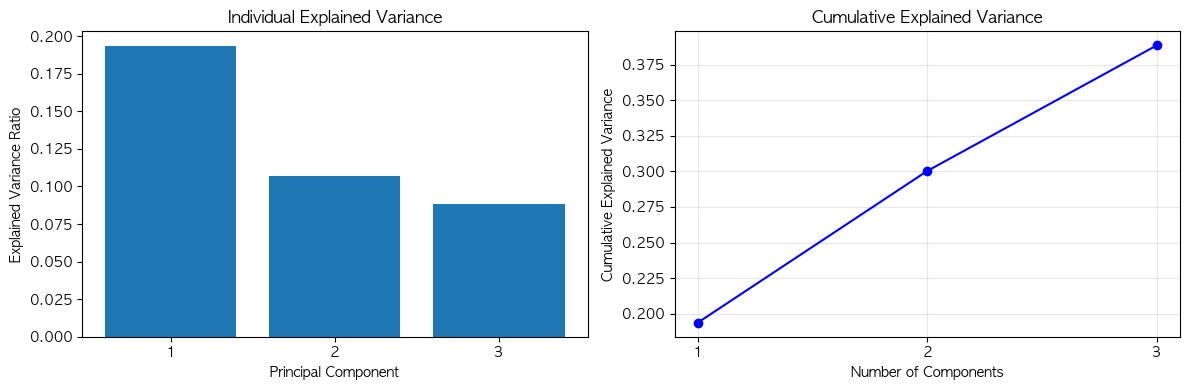

In [28]:
def apply_pca_reduction(X, n_components=3):
    """PCA를 사용한 차원 축소"""

    # 데이터 표준화
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # PCA 적용
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    # 설명된 분산비 출력
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

    print(f"PCA 결과:")
    for i in range(n_components):
        print(f"PC{i+1}: {explained_variance_ratio[i]:.3f} ({explained_variance_ratio[i]*100:.1f}%)")
    print(f"누적 설명 분산비: {cumulative_variance_ratio[-1]:.3f} ({cumulative_variance_ratio[-1]*100:.1f}%)")

    # 주성분별 기여도가 높은 원본 피처 확인
    print(f"\n각 주성분별 주요 피처 (상위 5개):")
    feature_names = X.columns if hasattr(X, 'columns') else [f'feature_{i}' for i in range(X.shape[1])]

    for i in range(n_components):
        pc_loadings = pca.components_[i]
        # 절댓값이 큰 순서로 정렬
        top_features_idx = np.argsort(np.abs(pc_loadings))[::-1][:5]
        print(f"\nPC{i+1} 주요 피처:")
        for j, idx in enumerate(top_features_idx):
            print(f"  {j+1}. {feature_names[idx]}: {pc_loadings[idx]:.3f}")

    return X_pca, scaler, pca

def visualize_pca_variance(pca, max_components=10):
    """PCA 분산 설명비 시각화"""

    n_components = min(len(pca.explained_variance_ratio_), max_components)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # 개별 분산 설명비
    ax1.bar(range(1, n_components+1), pca.explained_variance_ratio_[:n_components])
    ax1.set_xlabel('Principal Component')
    ax1.set_ylabel('Explained Variance Ratio')
    ax1.set_title('Individual Explained Variance')
    ax1.set_xticks(range(1, n_components+1))

    # 누적 분산 설명비
    cumsum_var = np.cumsum(pca.explained_variance_ratio_[:n_components])
    ax2.plot(range(1, n_components+1), cumsum_var, 'bo-')
    ax2.set_xlabel('Number of Components')
    ax2.set_ylabel('Cumulative Explained Variance')
    ax2.set_title('Cumulative Explained Variance')
    ax2.set_xticks(range(1, n_components+1))
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

X_pca, scaler, pca = apply_pca_reduction(X, n_components=3)
visualize_pca_variance(pca)

K-means 하이퍼파라미터 튜닝 (k=3~10)
--------------------------------------------------
k=3: 실루엣 스코어 = 0.3555, Inertia = 361379.65
k=4: 실루엣 스코어 = 0.3983, Inertia = 275386.85
k=5: 실루엣 스코어 = 0.4351, Inertia = 215958.35
k=6: 실루엣 스코어 = 0.4770, Inertia = 165235.02
k=7: 실루엣 스코어 = 0.5149, Inertia = 129666.68
k=8: 실루엣 스코어 = 0.5295, Inertia = 109150.32
k=9: 실루엣 스코어 = 0.5107, Inertia = 93264.09
k=10: 실루엣 스코어 = 0.5040, Inertia = 80910.81

최적 K-means 파라미터: k=8, 실루엣 스코어=0.5295


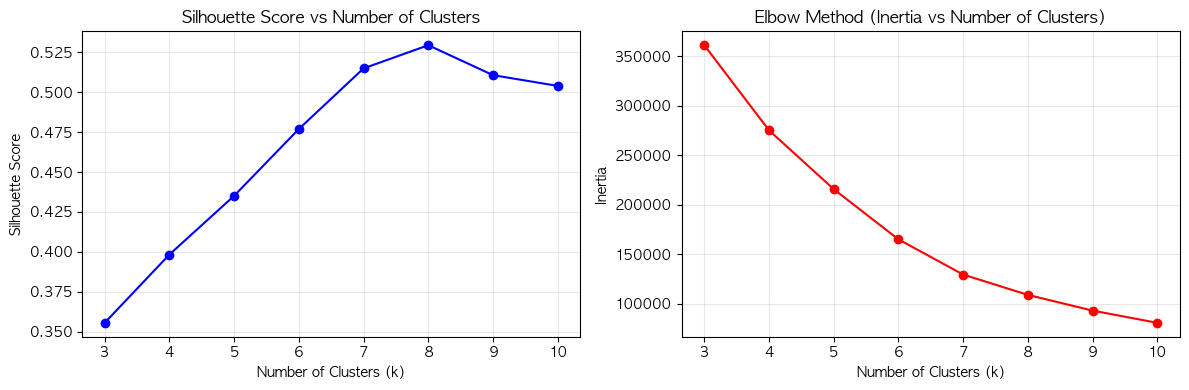

최적 k=8로 최종 K-means 클러스터링 수행

클러스터별 크기:
  클러스터 0: 16,011개 (15.9%)
  클러스터 1: 13,815개 (13.7%)
  클러스터 2: 16,126개 (16.0%)
  클러스터 3: 5,548개 (5.5%)
  클러스터 4: 5,815개 (5.8%)
  클러스터 5: 8,676개 (8.6%)
  클러스터 6: 23,183개 (23.0%)
  클러스터 7: 11,408개 (11.3%)

최종 실루엣 스코어: 0.5295


In [30]:
def optimize_kmeans(X_pca, k_range=range(3, 11)):
    """K-means 하이퍼파라미터 튜닝"""

    print(f"K-means 하이퍼파라미터 튜닝 (k={k_range.start}~{k_range.stop-1})")
    print("-" * 50)

    best_score = -1
    best_k = 2
    scores = []
    inertias = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X_pca)

        if len(np.unique(cluster_labels)) > 1:  # 클러스터가 1개가 아닌 경우만
            score = silhouette_score(X_pca, cluster_labels)
            scores.append(score)
            inertias.append(kmeans.inertia_)
            print(f"k={k}: 실루엣 스코어 = {score:.4f}, Inertia = {kmeans.inertia_:.2f}")

            if score > best_score:
                best_score = score
                best_k = k
        else:
            scores.append(-1)
            inertias.append(0)
            print(f"k={k}: 클러스터링 실패")

    print(f"\n최적 K-means 파라미터: k={best_k}, 실루엣 스코어={best_score:.4f}")

    return best_k, best_score, scores, inertias

def plot_kmeans_scores(k_range, scores, inertias):
    """K-means 성능 지표 시각화"""

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # 실루엣 스코어
    valid_scores = [s for s in scores if s != -1]
    valid_k = [k for k, s in zip(k_range, scores) if s != -1]

    ax1.plot(valid_k, valid_scores, 'bo-')
    ax1.set_xlabel('Number of Clusters (k)')
    ax1.set_ylabel('Silhouette Score')
    ax1.set_title('Silhouette Score vs Number of Clusters')
    ax1.grid(True, alpha=0.3)
    ax1.set_xticks(valid_k)

    # Elbow Method (Inertia)
    valid_inertias = [i for i in inertias if i != 0]
    ax2.plot(valid_k, valid_inertias, 'ro-')
    ax2.set_xlabel('Number of Clusters (k)')
    ax2.set_ylabel('Inertia')
    ax2.set_title('Elbow Method (Inertia vs Number of Clusters)')
    ax2.grid(True, alpha=0.3)
    ax2.set_xticks(valid_k)

    plt.tight_layout()
    plt.show()

def perform_final_kmeans(X_pca, best_k):
    """최적 k로 최종 K-means 수행"""

    print(f"최적 k={best_k}로 최종 K-means 클러스터링 수행")

    kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
    kmeans_labels = kmeans_final.fit_predict(X_pca)

    # 클러스터별 크기 확인
    unique_labels, counts = np.unique(kmeans_labels, return_counts=True)
    print(f"\n클러스터별 크기:")
    for label, count in zip(unique_labels, counts):
        print(f"  클러스터 {label}: {count:,}개 ({count/len(X_pca)*100:.1f}%)")

    # 최종 실루엣 스코어
    final_score = silhouette_score(X_pca, kmeans_labels)
    print(f"\n최종 실루엣 스코어: {final_score:.4f}")

    return kmeans_final, kmeans_labels, final_score

best_k, best_score, scores, inertias = optimize_kmeans(X_pca)
plot_kmeans_scores(range(3, 11), scores, inertias)
kmeans_model, kmeans_labels, final_score = perform_final_kmeans(X_pca, best_k)

DBSCAN 하이퍼파라미터 튜닝
eps 범위: 0.1~1.5
min_samples 범위: 2~29
--------------------------------------------------
큰 데이터셋으로 인해 10000개 샘플로 튜닝 수행
상위 5개 DBSCAN 결과:
   eps  min_samples  n_clusters  n_noise  noise_ratio  silhouette_score
1.5000            2           3        5       0.0005            0.5627
0.7000           29           4      199       0.0199            0.4266
0.7000           28           4      191       0.0191            0.4263
0.7000           27           4      189       0.0189            0.4262
0.5000           17           4      317       0.0317            0.4225

최적 DBSCAN 파라미터: eps=1.5, min_samples=2
최고 실루엣 스코어: 0.5627


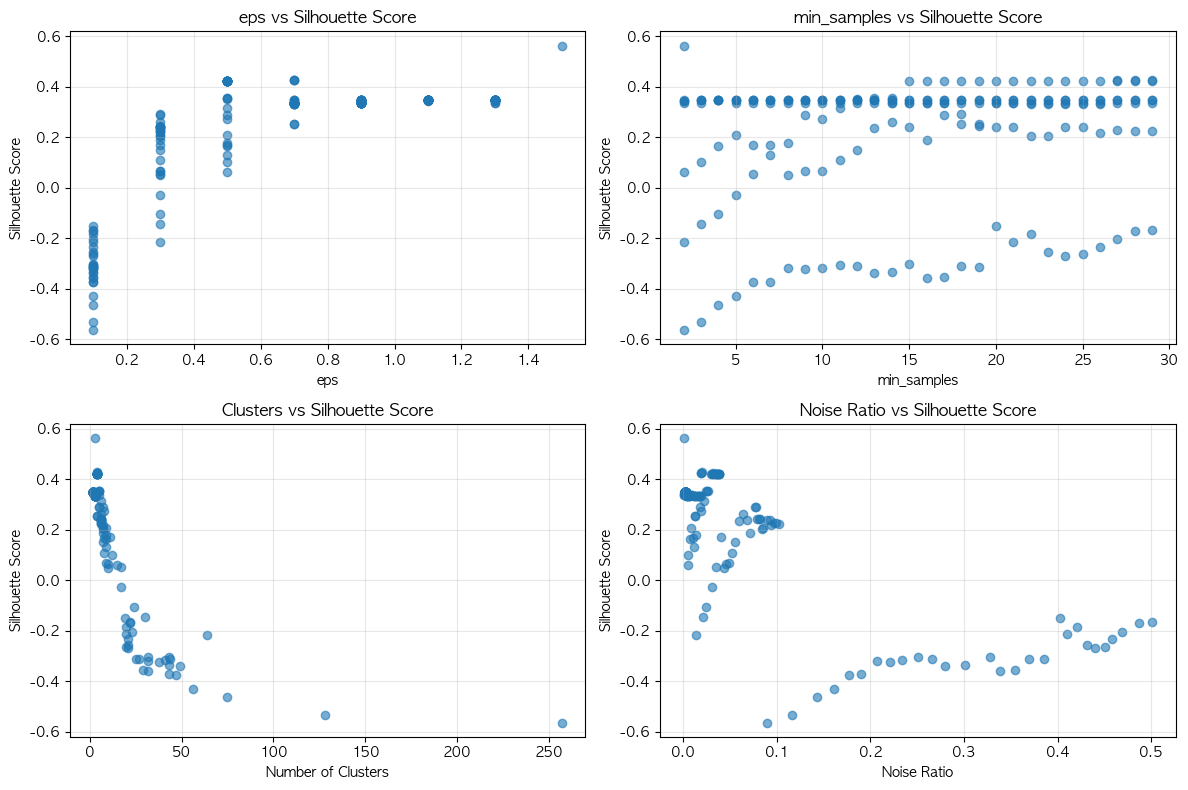

최적 파라미터로 최종 DBSCAN 클러스터링 수행
eps=1.5, min_samples=2

클러스터별 크기:
  노이즈: 3개 (0.0%)
  클러스터 0: 100,577개 (100.0%)
  클러스터 1: 2개 (0.0%)

최종 실루엣 스코어: 0.6893


In [32]:
def optimize_dbscan(X_pca, eps_range=np.arange(0.1, 1.6, 0.2), min_samples_range=range(2, 30, 1)):
    """DBSCAN 하이퍼파라미터 튜닝"""

    print(f"DBSCAN 하이퍼파라미터 튜닝")
    print(f"eps 범위: {eps_range[0]:.1f}~{eps_range[-1]:.1f}")
    print(f"min_samples 범위: {min_samples_range.start}~{min_samples_range.stop-1}")
    print("-" * 50)

    best_score = -1
    best_params = {'eps': 0.5, 'min_samples': 5}
    results = []

    # 샘플링으로 튜닝 속도 향상 (데이터가 큰 경우)
    if len(X_pca) > 10000:
        sample_idx = np.random.choice(len(X_pca), 10000, replace=False)
        X_sample = X_pca[sample_idx]
        print(f"큰 데이터셋으로 인해 {len(X_sample)}개 샘플로 튜닝 수행")
    else:
        X_sample = X_pca

    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            cluster_labels = dbscan.fit_predict(X_sample)

            # 노이즈 포인트(-1) 제외하고 실제 클러스터 개수 확인
            unique_labels = np.unique(cluster_labels)
            n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
            n_noise = np.sum(cluster_labels == -1)

            if n_clusters > 1 and n_noise < len(X_sample) * 0.9:  # 클러스터가 존재하고 노이즈가 90% 미만
                score = silhouette_score(X_sample, cluster_labels)
                results.append({
                    'eps': eps,
                    'min_samples': min_samples,
                    'n_clusters': n_clusters,
                    'n_noise': n_noise,
                    'noise_ratio': n_noise / len(X_sample),
                    'silhouette_score': score
                })

                if score > best_score:
                    best_score = score
                    best_params = {'eps': eps, 'min_samples': min_samples}

    # 상위 5개 결과 출력
    if results:
        results_df = pd.DataFrame(results)
        results_df = results_df.sort_values('silhouette_score', ascending=False)

        print("상위 5개 DBSCAN 결과:")
        print(results_df.head().to_string(index=False, float_format='%.4f'))
        print(f"\n최적 DBSCAN 파라미터: eps={best_params['eps']:.1f}, min_samples={best_params['min_samples']}")
        print(f"최고 실루엣 스코어: {best_score:.4f}")
    else:
        print("유효한 DBSCAN 결과를 찾지 못했습니다.")
        best_params = {'eps': 0.5, 'min_samples': 5}
        best_score = -1

    return best_params, best_score, results

def perform_final_dbscan(X_pca, best_params):
    """최적 파라미터로 최종 DBSCAN 수행"""

    print(f"최적 파라미터로 최종 DBSCAN 클러스터링 수행")
    print(f"eps={best_params['eps']:.1f}, min_samples={best_params['min_samples']}")

    dbscan_final = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
    dbscan_labels = dbscan_final.fit_predict(X_pca)

    # 클러스터별 크기 확인
    unique_labels, counts = np.unique(dbscan_labels, return_counts=True)
    print(f"\n클러스터별 크기:")
    for label, count in zip(unique_labels, counts):
        if label == -1:
            print(f"  노이즈: {count:,}개 ({count/len(X_pca)*100:.1f}%)")
        else:
            print(f"  클러스터 {label}: {count:,}개 ({count/len(X_pca)*100:.1f}%)")

    # 실루엣 스코어 (노이즈 제외)
    if len(np.unique(dbscan_labels)) > 1:
        final_score = silhouette_score(X_pca, dbscan_labels)
        print(f"\n최종 실루엣 스코어: {final_score:.4f}")
    else:
        final_score = -1
        print(f"\n유효한 클러스터를 찾지 못했습니다.")

    return dbscan_final, dbscan_labels, final_score

def plot_dbscan_results(results_df):
    """DBSCAN 튜닝 결과 시각화"""

    if len(results_df) == 0:
        print("시각화할 DBSCAN 결과가 없습니다.")
        return

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

    # eps vs 실루엣 스코어
    ax1.scatter(results_df['eps'], results_df['silhouette_score'], alpha=0.6)
    ax1.set_xlabel('eps')
    ax1.set_ylabel('Silhouette Score')
    ax1.set_title('eps vs Silhouette Score')
    ax1.grid(True, alpha=0.3)

    # min_samples vs 실루엣 스코어
    ax2.scatter(results_df['min_samples'], results_df['silhouette_score'], alpha=0.6)
    ax2.set_xlabel('min_samples')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('min_samples vs Silhouette Score')
    ax2.grid(True, alpha=0.3)

    # 클러스터 수 vs 실루엣 스코어
    ax3.scatter(results_df['n_clusters'], results_df['silhouette_score'], alpha=0.6)
    ax3.set_xlabel('Number of Clusters')
    ax3.set_ylabel('Silhouette Score')
    ax3.set_title('Clusters vs Silhouette Score')
    ax3.grid(True, alpha=0.3)

    # 노이즈 비율 vs 실루엣 스코어
    ax4.scatter(results_df['noise_ratio'], results_df['silhouette_score'], alpha=0.6)
    ax4.set_xlabel('Noise Ratio')
    ax4.set_ylabel('Silhouette Score')
    ax4.set_title('Noise Ratio vs Silhouette Score')
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

best_params, best_score, results = optimize_dbscan(X_pca)
if results:
    results_df = pd.DataFrame(results)
    plot_dbscan_results(results_df)
dbscan_model, dbscan_labels, final_score = perform_final_dbscan(X_pca, best_params)

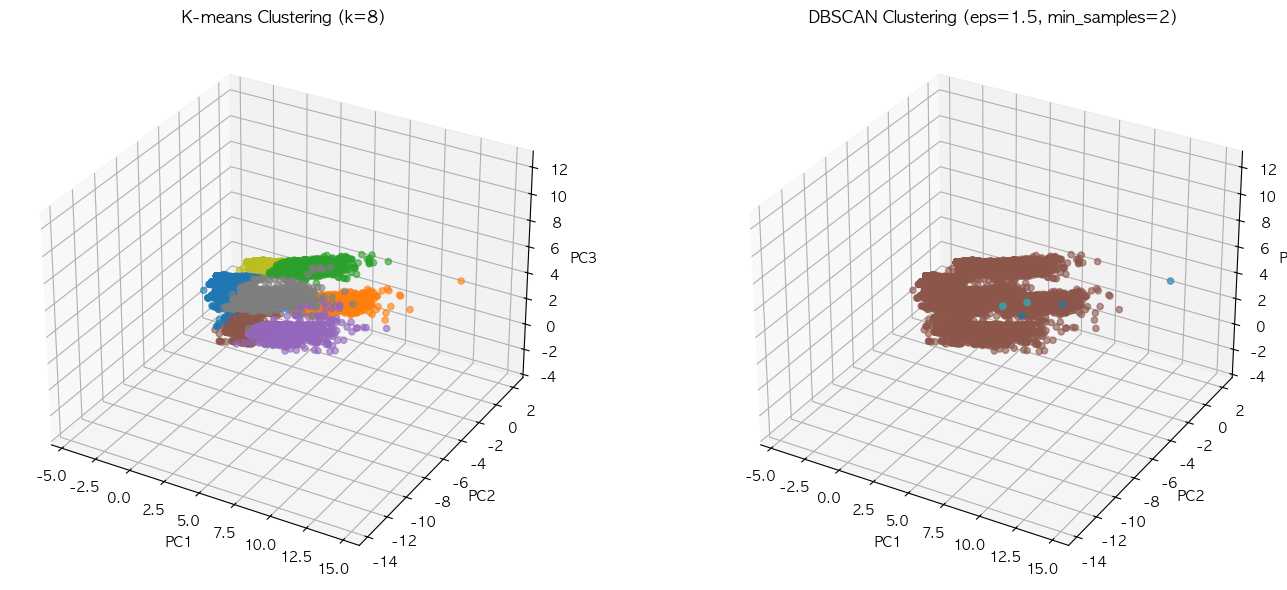

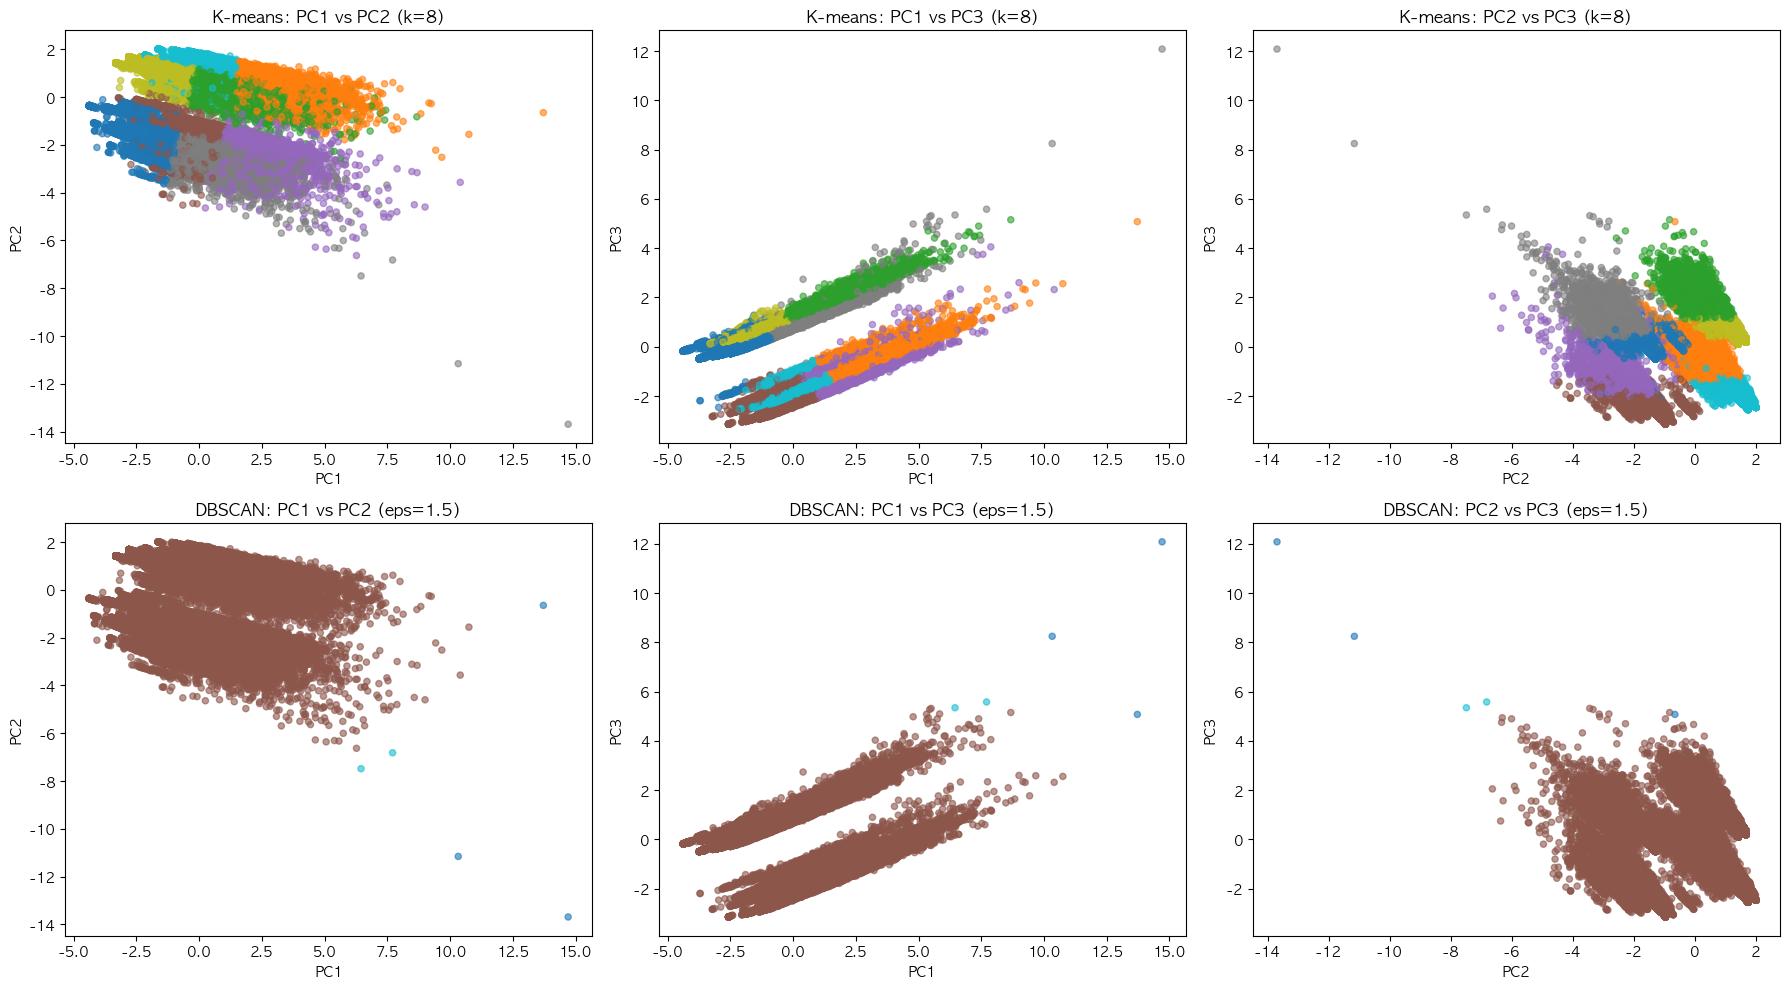

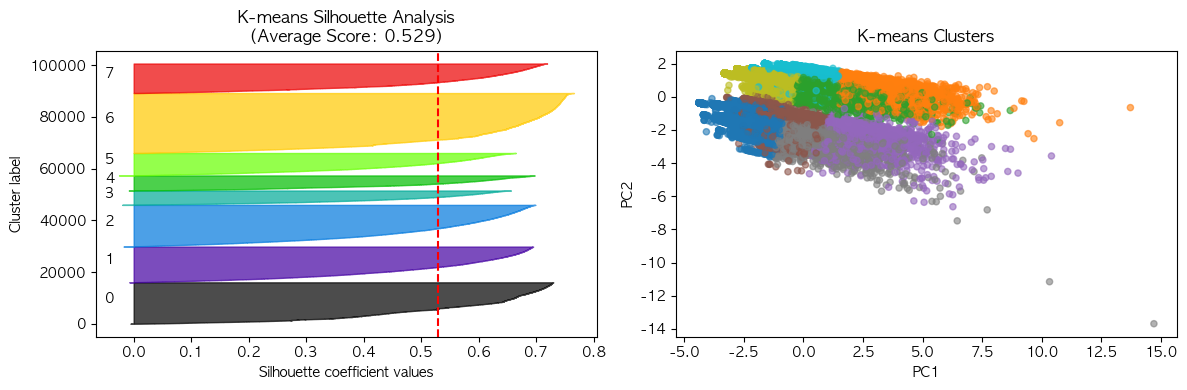

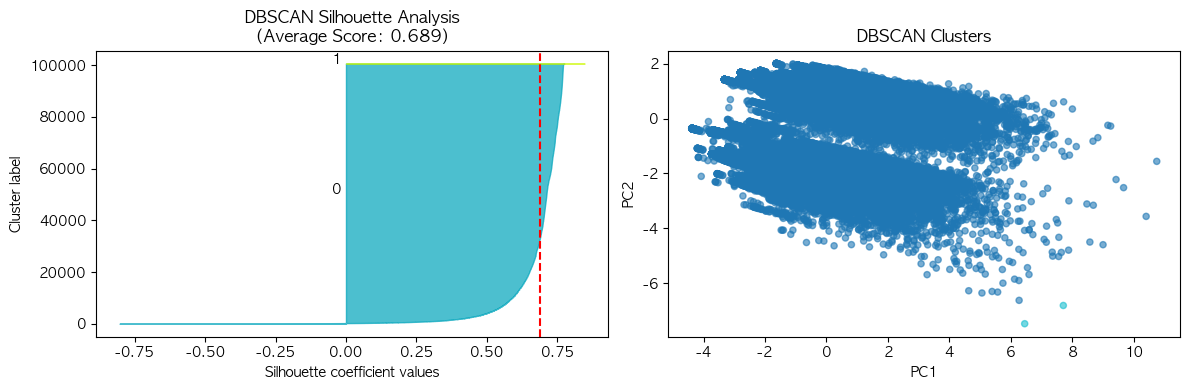

NameError: name 'kmeans_score' is not defined

In [34]:
def visualize_clusters_3d(X_pca, kmeans_labels, dbscan_labels, best_k, best_dbscan_params):
    """3D 클러스터링 결과 시각화"""

    fig = plt.figure(figsize=(15, 6))

    # K-means 결과
    ax1 = fig.add_subplot(121, projection='3d')
    scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                          c=kmeans_labels, cmap='tab10', alpha=0.6, s=20)
    ax1.set_title(f'K-means Clustering (k={best_k})', fontsize=12)
    ax1.set_xlabel('PC1')
    ax1.set_ylabel('PC2')
    ax1.set_zlabel('PC3')

    # DBSCAN 결과
    ax2 = fig.add_subplot(122, projection='3d')
    scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                          c=dbscan_labels, cmap='tab10', alpha=0.6, s=20)
    ax2.set_title(f'DBSCAN Clustering (eps={best_dbscan_params["eps"]:.1f}, min_samples={best_dbscan_params["min_samples"]})',
                  fontsize=12)
    ax2.set_xlabel('PC1')
    ax2.set_ylabel('PC2')
    ax2.set_zlabel('PC3')

    plt.tight_layout()
    plt.show()

def visualize_clusters_2d(X_pca, kmeans_labels, dbscan_labels, best_k, best_dbscan_params):
    """2D 클러스터링 결과 시각화 (PC1-PC2, PC1-PC3, PC2-PC3)"""

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    # K-means 결과
    # PC1 vs PC2
    axes[0,0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='tab10', alpha=0.6, s=20)
    axes[0,0].set_xlabel('PC1')
    axes[0,0].set_ylabel('PC2')
    axes[0,0].set_title(f'K-means: PC1 vs PC2 (k={best_k})')

    # PC1 vs PC3
    axes[0,1].scatter(X_pca[:, 0], X_pca[:, 2], c=kmeans_labels, cmap='tab10', alpha=0.6, s=20)
    axes[0,1].set_xlabel('PC1')
    axes[0,1].set_ylabel('PC3')
    axes[0,1].set_title(f'K-means: PC1 vs PC3 (k={best_k})')

    # PC2 vs PC3
    axes[0,2].scatter(X_pca[:, 1], X_pca[:, 2], c=kmeans_labels, cmap='tab10', alpha=0.6, s=20)
    axes[0,2].set_xlabel('PC2')
    axes[0,2].set_ylabel('PC3')
    axes[0,2].set_title(f'K-means: PC2 vs PC3 (k={best_k})')

    # DBSCAN 결과
    # PC1 vs PC2
    axes[1,0].scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='tab10', alpha=0.6, s=20)
    axes[1,0].set_xlabel('PC1')
    axes[1,0].set_ylabel('PC2')
    axes[1,0].set_title(f'DBSCAN: PC1 vs PC2 (eps={best_dbscan_params["eps"]:.1f})')

    # PC1 vs PC3
    axes[1,1].scatter(X_pca[:, 0], X_pca[:, 2], c=dbscan_labels, cmap='tab10', alpha=0.6, s=20)
    axes[1,1].set_xlabel('PC1')
    axes[1,1].set_ylabel('PC3')
    axes[1,1].set_title(f'DBSCAN: PC1 vs PC3 (eps={best_dbscan_params["eps"]:.1f})')

    # PC2 vs PC3
    axes[1,2].scatter(X_pca[:, 1], X_pca[:, 2], c=dbscan_labels, cmap='tab10', alpha=0.6, s=20)
    axes[1,2].set_xlabel('PC2')
    axes[1,2].set_ylabel('PC3')
    axes[1,2].set_title(f'DBSCAN: PC2 vs PC3 (eps={best_dbscan_params["eps"]:.1f})')

    plt.tight_layout()
    plt.show()

def plot_silhouette_analysis(X_pca, cluster_labels, method_name):
    """실루엣 분석 플롯"""

    if len(np.unique(cluster_labels)) < 2:
        print(f"{method_name}: 클러스터가 충분하지 않습니다.")
        return

    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # 실루엣 플롯
    y_lower = 10
    unique_labels = np.unique(cluster_labels)

    for i, label in enumerate(unique_labels):
        if label == -1:  # 노이즈 포인트는 제외
            continue

        cluster_silhouette_values = sample_silhouette_values[cluster_labels == label]
        cluster_silhouette_values.sort()

        size_cluster_i = cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / len(unique_labels))
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                         0, cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(label))
        y_lower = y_upper + 10

    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster label')
    ax1.set_title(f'{method_name} Silhouette Analysis\n(Average Score: {silhouette_avg:.3f})')

    # 평균 실루엣 스코어 선
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # 클러스터별 분포
    if -1 in cluster_labels:  # DBSCAN의 경우 노이즈 제외
        mask = cluster_labels != -1
        scatter = ax2.scatter(X_pca[mask, 0], X_pca[mask, 1],
                            c=cluster_labels[mask], cmap='tab10', alpha=0.6, s=20)
    else:
        scatter = ax2.scatter(X_pca[:, 0], X_pca[:, 1],
                            c=cluster_labels, cmap='tab10', alpha=0.6, s=20)

    ax2.set_xlabel('PC1')
    ax2.set_ylabel('PC2')
    ax2.set_title(f'{method_name} Clusters')

    plt.tight_layout()
    plt.show()

visualize_clusters_3d(X_pca, kmeans_labels, dbscan_labels, best_k, best_params)
visualize_clusters_2d(X_pca, kmeans_labels, dbscan_labels, best_k, best_params)
plot_silhouette_analysis(X_pca, kmeans_labels, "K-means")
plot_silhouette_analysis(X_pca, dbscan_labels, "DBSCAN")

In [36]:
def analyze_cluster_characteristics(df, kmeans_labels, dbscan_labels):
    """클러스터별 특성 분석"""

    print("="*60)
    print("클러스터 특성 분석")
    print("="*60)

    # K-means 클러스터 분석
    df_kmeans = df.copy()
    df_kmeans['cluster'] = kmeans_labels

    print(f"\n1. K-means 클러스터별 특성:")
    print("-" * 40)

    # 클러스터별 크기
    cluster_sizes = df_kmeans['cluster'].value_counts().sort_index()
    print("클러스터별 크기:")
    for cluster, size in cluster_sizes.items():
        print(f"  클러스터 {cluster}: {size:,}개 ({size/len(df)*100:.1f}%)")

    # 주요 피처별 평균값 비교
    key_features = ['평점', 'full_text_length', 'emoticon_count', 'emphasis_count',
                   'sentiment_positive', 'sentiment_negative', 'sentiment_neutral',
                   'recommend_mention', 'not_recommend_mention', 'repurchase_mention',
                   'delivery_mention', 'quality_mention', 'anger_mention']

    available_features = [f for f in key_features if f in df.columns]

    if available_features:
        print(f"\n주요 피처별 클러스터 평균:")
        cluster_stats = df_kmeans.groupby('cluster')[available_features].mean()
        print(cluster_stats.round(3))

    # DBSCAN 클러스터 분석
    df_dbscan = df.copy()
    df_dbscan['cluster'] = dbscan_labels

    print(f"\n2. DBSCAN 클러스터별 특성:")
    print("-" * 40)

    # 클러스터별 크기 (노이즈 포함)
    cluster_sizes_dbscan = df_dbscan['cluster'].value_counts().sort_index()
    print("클러스터별 크기:")
    for cluster, size in cluster_sizes_dbscan.items():
        if cluster == -1:
            print(f"  노이즈: {size:,}개 ({size/len(df)*100:.1f}%)")
        else:
            print(f"  클러스터 {cluster}: {size:,}개 ({size/len(df)*100:.1f}%)")

    if available_features:
        print(f"\n주요 피처별 클러스터 평균 (노이즈 제외):")
        cluster_stats_dbscan = df_dbscan[df_dbscan['cluster'] != -1].groupby('cluster')[available_features].mean()
        if len(cluster_stats_dbscan) > 0:
            print(cluster_stats_dbscan.round(3))

    return df_kmeans, df_dbscan

def detailed_cluster_profiling(df_with_clusters, cluster_column='cluster', method_name=''):
    """상세한 클러스터 프로파일링"""

    print(f"\n{method_name} 상세 클러스터 프로파일링:")
    print("="*50)

    # 클러스터별로 반복
    unique_clusters = sorted(df_with_clusters[cluster_column].unique())

    for cluster in unique_clusters:
        if cluster == -1:
            print(f"\n📍 노이즈 포인트 분석:")
        else:
            print(f"\n📍 클러스터 {cluster} 분석:")
        print("-" * 30)

        cluster_data = df_with_clusters[df_with_clusters[cluster_column] == cluster]

        # 기본 통계
        print(f"크기: {len(cluster_data):,}개 ({len(cluster_data)/len(df_with_clusters)*100:.1f}%)")

        # 평점 분포
        if '평점' in cluster_data.columns:
            rating_dist = cluster_data['평점'].value_counts().sort_index()
            print(f"평점 분포: {dict(rating_dist)}")
            print(f"평균 평점: {cluster_data['평점'].mean():.2f}")

        # 감정 분포
        sentiment_cols = ['sentiment_positive', 'sentiment_negative', 'sentiment_neutral']
        available_sentiment = [col for col in sentiment_cols if col in cluster_data.columns]
        if available_sentiment:
            sentiment_counts = cluster_data[available_sentiment].sum()
            print(f"감정 분포: 긍정 {sentiment_counts.get('sentiment_positive', 0)}, "
                  f"부정 {sentiment_counts.get('sentiment_negative', 0)}, "
                  f"중립 {sentiment_counts.get('sentiment_neutral', 0)}")

        # 특징적인 키워드 언급률
        keyword_features = ['recommend_mention', 'repurchase_mention', 'delivery_mention',
                          'quality_mention', 'anger_mention']
        available_keywords = [col for col in keyword_features if col in cluster_data.columns]
        if available_keywords:
            keyword_rates = cluster_data[available_keywords].mean()
            print("키워드 언급률:")
            for col in available_keywords:
                feature_name = col.replace('_mention', '')
                print(f"  {feature_name}: {keyword_rates[col]:.1%}")

        # 텍스트 길이와 강조 표현
        if 'full_text_length' in cluster_data.columns:
            print(f"평균 텍스트 길이: {cluster_data['full_text_length'].mean():.0f}자")
        if 'emphasis_count' in cluster_data.columns:
            print(f"평균 강조 표현: {cluster_data['emphasis_count'].mean():.1f}개")

def compare_clusters_statistically(df_kmeans, df_dbscan):
    """클러스터 간 통계적 비교"""

    print("\n통계적 클러스터 비교:")
    print("="*40)

    # 수치형 피처들 선택
    numeric_features = df_kmeans.select_dtypes(include=[np.number]).columns
    numeric_features = [col for col in numeric_features if col != 'cluster']

    # K-means 클러스터 간 분산 분석
    print("\nK-means 클러스터 간 특성 차이 (표준편차):")
    kmeans_cluster_std = df_kmeans.groupby('cluster')[numeric_features].std().mean(axis=1)
    print(kmeans_cluster_std.round(3))

    # DBSCAN 클러스터 간 분산 분석 (노이즈 제외)
    df_dbscan_no_noise = df_dbscan[df_dbscan['cluster'] != -1]
    if len(df_dbscan_no_noise) > 0:
        print("\nDBSCAN 클러스터 간 특성 차이 (표준편차):")
        dbscan_cluster_std = df_dbscan_no_noise.groupby('cluster')[numeric_features].std().mean(axis=1)
        print(dbscan_cluster_std.round(3))

def save_cluster_results(df_kmeans, df_dbscan, filename_prefix='cluster_results'):
    """클러스터링 결과 저장"""

    # K-means 결과 저장
    kmeans_file = f"{filename_prefix}_kmeans.csv"
    df_kmeans.to_csv(kmeans_file, index=False, encoding='utf-8')
    print(f"K-means 결과 저장: {kmeans_file}")

    # DBSCAN 결과 저장
    dbscan_file = f"{filename_prefix}_dbscan.csv"
    df_dbscan.to_csv(dbscan_file, index=False, encoding='utf-8')
    print(f"DBSCAN 결과 저장: {dbscan_file}")

    # 클러스터별 요약 저장
    summary_data = []

    # K-means 요약
    for cluster in sorted(df_kmeans['cluster'].unique()):
        cluster_data = df_kmeans[df_kmeans['cluster'] == cluster]
        summary_data.append({
            'method': 'K-means',
            'cluster': cluster,
            'size': len(cluster_data),
            'percentage': len(cluster_data) / len(df_kmeans) * 100,
            'avg_rating': cluster_data['평점'].mean() if '평점' in cluster_data.columns else None,
            'avg_text_length': cluster_data['full_text_length'].mean() if 'full_text_length' in cluster_data.columns else None
        })

    # DBSCAN 요약
    for cluster in sorted(df_dbscan['cluster'].unique()):
        cluster_data = df_dbscan[df_dbscan['cluster'] == cluster]
        summary_data.append({
            'method': 'DBSCAN',
            'cluster': cluster,
            'size': len(cluster_data),
            'percentage': len(cluster_data) / len(df_dbscan) * 100,
            'avg_rating': cluster_data['평점'].mean() if '평점' in cluster_data.columns else None,
            'avg_text_length': cluster_data['full_text_length'].mean() if 'full_text_length' in cluster_data.columns else None
        })

    summary_df = pd.DataFrame(summary_data)
    summary_file = f"{filename_prefix}_summary.csv"
    summary_df.to_csv(summary_file, index=False, encoding='utf-8')
    print(f"클러스터 요약 저장: {summary_file}")

# 실행 예시
df_kmeans, df_dbscan = analyze_cluster_characteristics(df, kmeans_labels, dbscan_labels)
detailed_cluster_profiling(df_kmeans, 'cluster', 'K-means')
detailed_cluster_profiling(df_dbscan, 'cluster', 'DBSCAN')
compare_clusters_statistically(df_kmeans, df_dbscan)
save_cluster_results(df_kmeans, df_dbscan)

클러스터 특성 분석

1. K-means 클러스터별 특성:
----------------------------------------
클러스터별 크기:
  클러스터 0: 16,011개 (15.9%)
  클러스터 1: 13,815개 (13.7%)
  클러스터 2: 16,126개 (16.0%)
  클러스터 3: 5,548개 (5.5%)
  클러스터 4: 5,815개 (5.8%)
  클러스터 5: 8,676개 (8.6%)
  클러스터 6: 23,183개 (23.0%)
  클러스터 7: 11,408개 (11.3%)

주요 피처별 클러스터 평균:
            평점  full_text_length  emoticon_count  emphasis_count  \
cluster                                                            
0        4.031           147.048           0.101           1.718   
1        4.958           854.596           4.792           8.355   
2        4.950           731.114           3.672           7.188   
3        4.868           851.374           3.678           8.713   
4        4.609           289.905           0.433           2.856   
5        4.768           700.066           2.512           7.332   
6        4.835           152.822           0.195           1.692   
7        4.901           276.562           0.607           2.654   

         sentime

데이터 크기: (100582, 27)
피처 수: 20
클러스터 수: 8
t-SNE 3D 변환 시작...
파라미터: perplexity=30, n_iter=1000
샘플링: 10000개 사용
t-SNE 완료! KL divergence: 0.6055


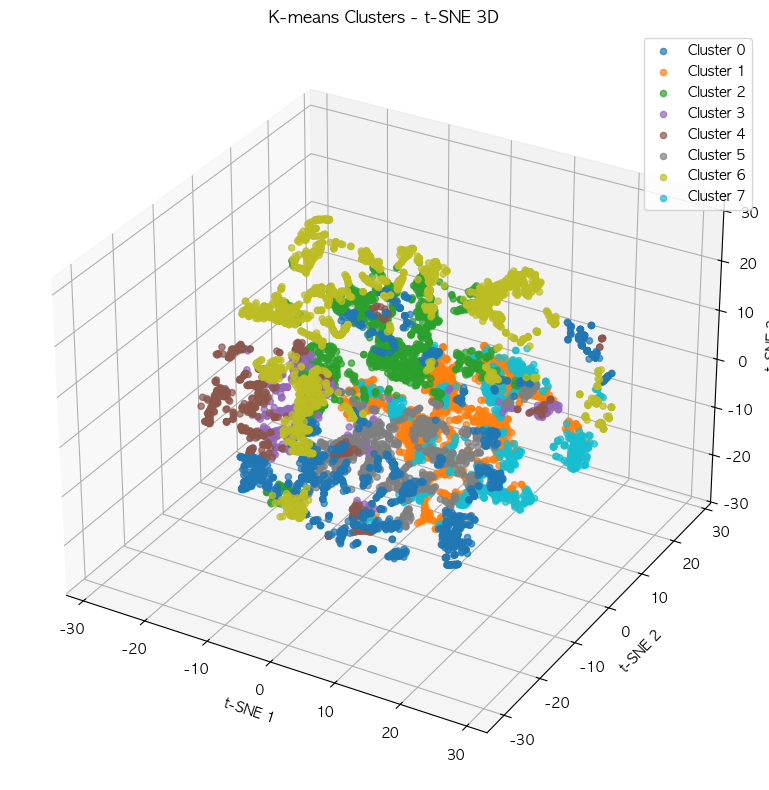

회전 GIF 생성 중...
GIF 저장 완료: kmeans_tsne_rotating.gif
고품질 GIF 생성 중... (144프레임)
진행률: 0/144
진행률: 10/144
진행률: 20/144
진행률: 30/144
진행률: 40/144
진행률: 50/144
진행률: 60/144
진행률: 70/144
진행률: 80/144
진행률: 90/144
진행률: 100/144
진행률: 110/144
진행률: 120/144
진행률: 130/144
진행률: 140/144
고품질 GIF 저장 완료: kmeans_tsne_hq.gif

t-SNE 클러스터 분석:
----------------------------------------
클러스터 0: 중심(5.45, -12.24, -1.96), 크기=1594
클러스터 1: 중심(4.18, 6.61, -7.03), 크기=1417
클러스터 2: 중심(-3.59, 0.59, 8.46), 크기=1595
클러스터 3: 중심(-9.75, -3.78, -4.28), 크기=542
클러스터 4: 중심(-15.32, -7.02, -3.35), 크기=590
클러스터 5: 중심(4.49, -8.87, -3.40), 크기=861
클러스터 6: 중심(-4.20, 3.88, 10.03), 크기=2239
클러스터 7: 중심(9.02, 10.70, -11.37), 크기=1162

클러스터 간 평균 거리: 18.37

✅ t-SNE 3D 시각화 및 GIF 생성 완료!


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import pdist
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.animation as animation
from PIL import Image
import io
import warnings
warnings.filterwarnings('ignore')

def load_and_prepare_data(file_path='cluster_results_kmeans.csv'):
    """클러스터 결과 데이터 로드 및 전처리"""

    df = pd.read_csv(file_path)
    print(f"데이터 크기: {df.shape}")

    # 클러스터링에 사용할 피처 선택 (텍스트 및 식별자 제외)
    exclude_cols = ['상품명', '구매상품명', '헤드라인', '리뷰내용', 'full_text',
                   '구매자명', '작성일자', 'sentiment_label', 'cluster']

    feature_cols = [col for col in df.columns if col not in exclude_cols]
    X = df[feature_cols].copy()

    # price_mention 원핫 인코딩 (있다면)
    if 'price_mention' in X.columns:
        price_dummies = pd.get_dummies(X['price_mention'], prefix='price')
        X = pd.concat([X.drop('price_mention', axis=1), price_dummies], axis=1)

    # 결측값 처리
    X = X.fillna(0)

    # 클러스터 라벨
    cluster_labels = df['cluster'].values

    print(f"피처 수: {X.shape[1]}")
    print(f"클러스터 수: {len(np.unique(cluster_labels))}")

    return X, cluster_labels, df

def apply_tsne_3d(X, cluster_labels, perplexity=30, n_iter=1000, random_state=42):
    """t-SNE 3D 차원 축소"""

    print(f"t-SNE 3D 변환 시작...")
    print(f"파라미터: perplexity={perplexity}, n_iter={n_iter}")

    # 데이터 표준화
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 큰 데이터셋인 경우 샘플링
    if len(X_scaled) > 10000:
        sample_idx = np.random.choice(len(X_scaled), 10000, replace=False)
        X_sample = X_scaled[sample_idx]
        labels_sample = cluster_labels[sample_idx]
        print(f"샘플링: {len(X_sample)}개 사용")
    else:
        X_sample = X_scaled
        labels_sample = cluster_labels

    # t-SNE 적용
    tsne = TSNE(n_components=3, perplexity=perplexity, n_iter=n_iter,
                random_state=random_state, learning_rate='auto', init='random')
    X_tsne = tsne.fit_transform(X_sample)

    print(f"t-SNE 완료! KL divergence: {tsne.kl_divergence_:.4f}")

    return X_tsne, labels_sample, scaler, tsne

def plot_static_3d(X_tsne, labels, title="t-SNE 3D Clustering"):
    """정적 3D 플롯"""

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # 클러스터별 색상
    unique_labels = np.unique(labels)
    colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

    for i, label in enumerate(unique_labels):
        mask = labels == label
        ax.scatter(X_tsne[mask, 0], X_tsne[mask, 1], X_tsne[mask, 2],
                  c=[colors[i]], label=f'Cluster {label}', alpha=0.7, s=20)

    ax.set_xlabel('t-SNE 1')
    ax.set_ylabel('t-SNE 2')
    ax.set_zlabel('t-SNE 3')
    ax.set_title(title)
    ax.legend()

    plt.tight_layout()
    plt.show()

def create_rotating_gif(X_tsne, labels, filename='tsne_3d_rotating.gif',
                       duration=100, elevation=20):
    """회전하는 3D 플롯 GIF 생성"""

    print(f"회전 GIF 생성 중...")

    # 그림 설정
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # 클러스터별 색상
    unique_labels = np.unique(labels)
    colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

    # 초기 플롯
    scatters = []
    for i, label in enumerate(unique_labels):
        mask = labels == label
        scatter = ax.scatter(X_tsne[mask, 0], X_tsne[mask, 1], X_tsne[mask, 2],
                           c=[colors[i]], label=f'Cluster {label}', alpha=0.7, s=20)
        scatters.append(scatter)

    ax.set_xlabel('t-SNE 1')
    ax.set_ylabel('t-SNE 2')
    ax.set_zlabel('t-SNE 3')
    ax.set_title('t-SNE 3D Clustering (Rotating)')
    ax.legend()

    # 축 범위 고정
    ax.set_xlim(X_tsne[:, 0].min(), X_tsne[:, 0].max())
    ax.set_ylim(X_tsne[:, 1].min(), X_tsne[:, 1].max())
    ax.set_zlim(X_tsne[:, 2].min(), X_tsne[:, 2].max())

    def animate(frame):
        ax.view_init(elev=elevation, azim=frame * 4)  # 4도씩 회전
        return scatters

    # 애니메이션 생성 (90프레임 = 360도)
    anim = animation.FuncAnimation(fig, animate, frames=90, interval=duration, blit=False)

    # GIF 저장
    anim.save(filename, writer='pillow', fps=10)
    plt.close()

    print(f"GIF 저장 완료: {filename}")

def create_high_quality_gif(X_tsne, labels, filename='tsne_3d_hq.gif',
                           frames=60, dpi=100):
    """고품질 회전 GIF (PIL 사용)"""

    print(f"고품질 GIF 생성 중... ({frames}프레임)")

    images = []

    # 클러스터별 색상
    unique_labels = np.unique(labels)
    colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

    for frame in range(frames):
        fig = plt.figure(figsize=(10, 8), dpi=dpi)
        ax = fig.add_subplot(111, projection='3d')

        # 클러스터별 플롯
        for i, label in enumerate(unique_labels):
            mask = labels == label
            ax.scatter(X_tsne[mask, 0], X_tsne[mask, 1], X_tsne[mask, 2],
                      c=[colors[i]], label=f'Cluster {label}', alpha=0.7, s=20)

        # 뷰 설정
        ax.view_init(elev=20, azim=frame * 6)  # 6도씩 회전
        ax.set_xlabel('t-SNE 1')
        ax.set_ylabel('t-SNE 2')
        ax.set_zlabel('t-SNE 3')
        ax.set_title('t-SNE 3D Clustering')

        if frame == 0:  # 첫 프레임에만 범례
            ax.legend()

        # 이미지로 변환
        buf = io.BytesIO()
        plt.savefig(buf, format='png', bbox_inches='tight', dpi=dpi)
        buf.seek(0)
        img = Image.open(buf)
        images.append(img)

        plt.close()

        if frame % 10 == 0:
            print(f"진행률: {frame}/{frames}")

    # GIF 저장
    images[0].save(filename, save_all=True, append_images=images[1:],
                   duration=100, loop=0, optimize=True)

    print(f"고품질 GIF 저장 완료: {filename}")

def analyze_tsne_clusters(X_tsne, labels, original_df):
    """t-SNE 결과 클러스터 분석"""

    print("\nt-SNE 클러스터 분석:")
    print("-" * 40)

    # 클러스터별 t-SNE 좌표 중심
    for label in np.unique(labels):
        mask = labels == label
        centroid = X_tsne[mask].mean(axis=0)
        size = np.sum(mask)
        print(f"클러스터 {label}: 중심({centroid[0]:.2f}, {centroid[1]:.2f}, {centroid[2]:.2f}), 크기={size}")

    # 클러스터 간 거리
    centroids = []
    for label in np.unique(labels):
        mask = labels == label
        centroid = X_tsne[mask].mean(axis=0)
        centroids.append(centroid)

    centroids = np.array(centroids)
    print(f"\n클러스터 간 평균 거리: {np.mean(pdist(centroids)):.2f}")

def main_tsne_analysis(csv_file='cluster_results_kmeans.csv'):
    """메인 t-SNE 분석 함수"""

    # 1. 데이터 로드
    X, cluster_labels, df = load_and_prepare_data(csv_file)

    # 2. t-SNE 적용
    X_tsne, labels_sample, scaler, tsne = apply_tsne_3d(X, cluster_labels)

    # 3. 정적 시각화
    plot_static_3d(X_tsne, labels_sample, "K-means Clusters - t-SNE 3D")

    # 4. 회전 GIF 생성 (기본)
    create_rotating_gif(X_tsne, labels_sample, 'kmeans_tsne_rotating.gif')

    # 5. 고품질 GIF 생성
    create_high_quality_gif(X_tsne, labels_sample, 'kmeans_tsne_hq.gif', frames=144)

    # 6. 클러스터 분석
    analyze_tsne_clusters(X_tsne, labels_sample, df)

    return X_tsne, labels_sample, df

# 실행
if __name__ == "__main__":
    X_tsne, labels, df = main_tsne_analysis('cluster_results_kmeans.csv')
    print("\n✅ t-SNE 3D 시각화 및 GIF 생성 완료!")

# 개별 실행 예시:
# X, cluster_labels, df = load_and_prepare_data('cluster_results_kmeans.csv')
# X_tsne, labels_sample, scaler, tsne = apply_tsne_3d(X, cluster_labels, perplexity=50)
# plot_static_3d(X_tsne, labels_sample)
# create_rotating_gif(X_tsne, labels_sample, 'my_rotation.gif')
# create_high_quality_gif(X_tsne, labels_sample, 'my_hq_rotation.gif', frames=90)

🔍 클러스터별 피처 분석 시작
데이터 크기: (100582, 27)
클러스터 분포: {0: np.int64(16011), 1: np.int64(13815), 2: np.int64(16126), 3: np.int64(5548), 4: np.int64(5815), 5: np.int64(8676), 6: np.int64(23183), 7: np.int64(11408)}

분석 피처 (18개): ['평점', '도움수', '이미지수', '헤드라인_존재', '리뷰내용_존재', 'full_text_length', 'emoticon_count', 'sentiment_positive', 'sentiment_negative', 'sentiment_neutral', 'repurchase_mention', 'delivery_mention', 'quality_mention', 'recommend_mention', 'not_recommend_mention', 'emphasis_count', 'anger_mention', 'price_mention']

📊 1. 클러스터별 피처 평균 히트맵


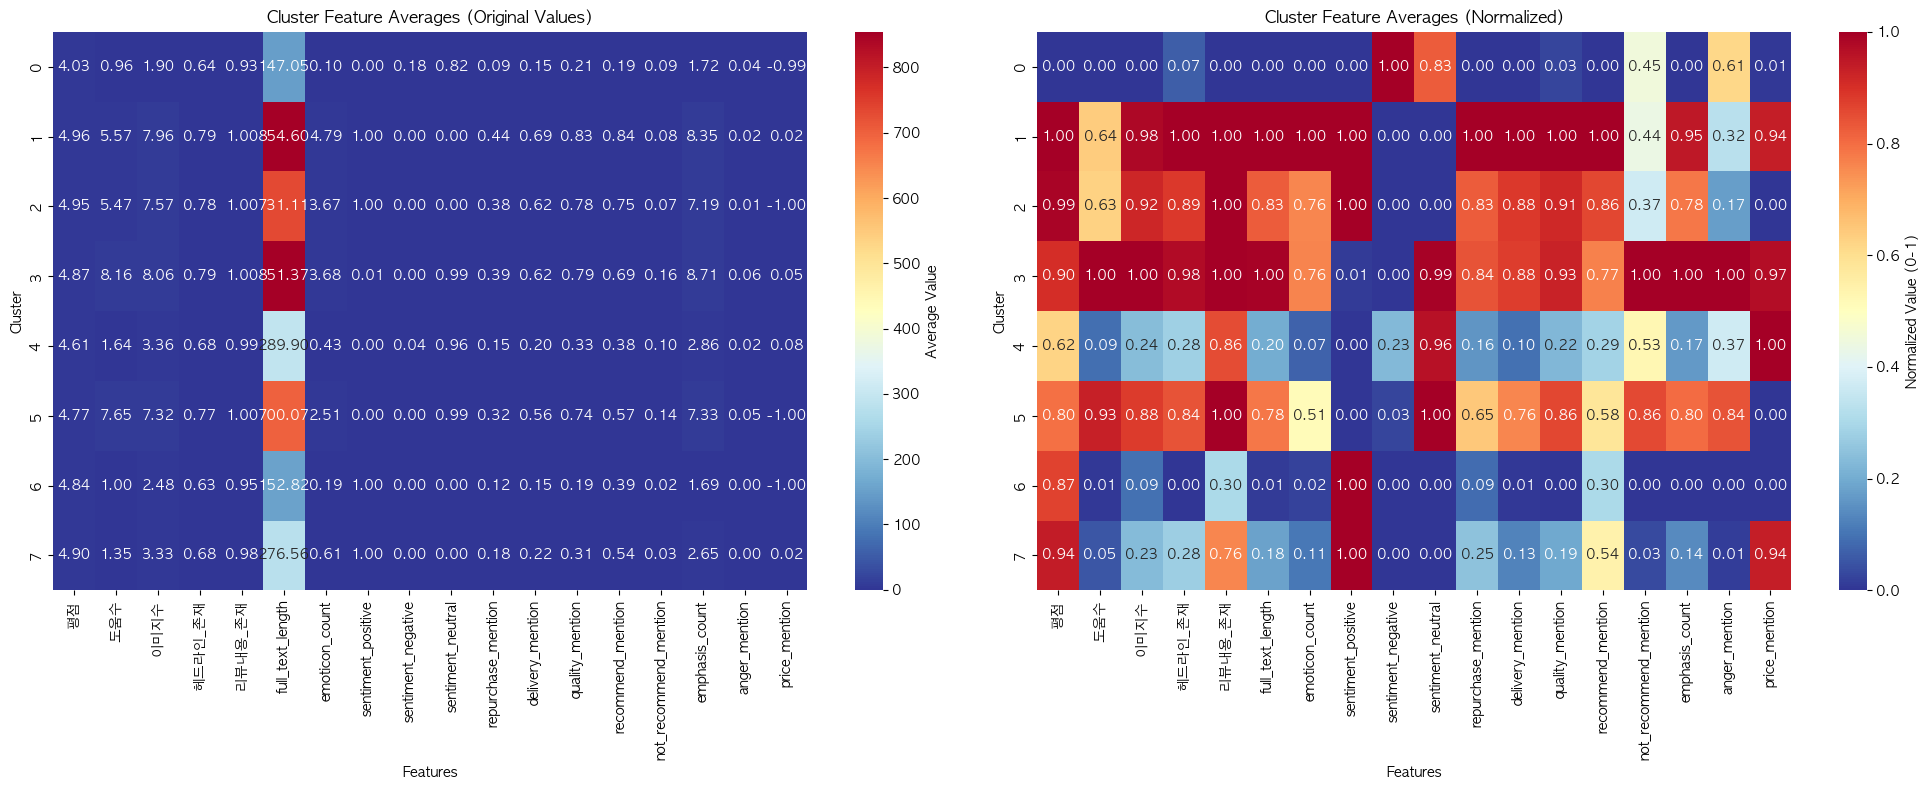


🎯 2. 클러스터별 레이더 차트


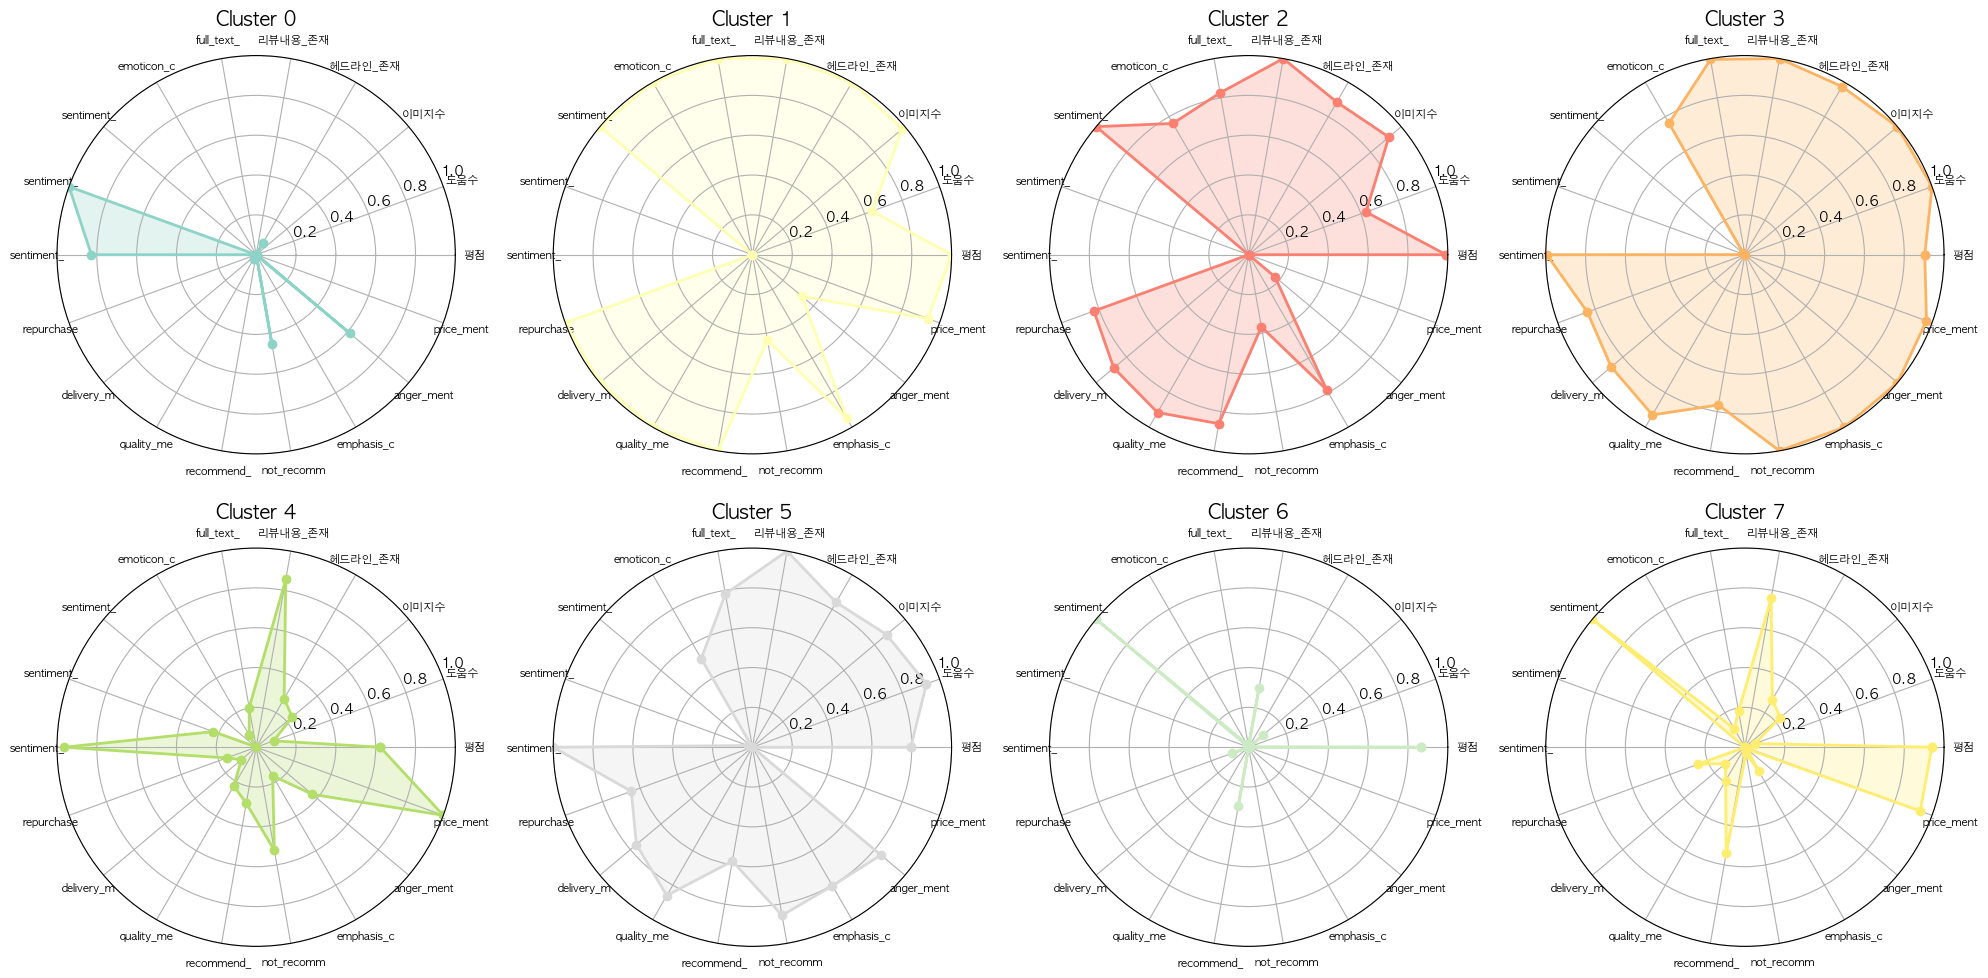


📈 3. 주요 피처 분포 비교


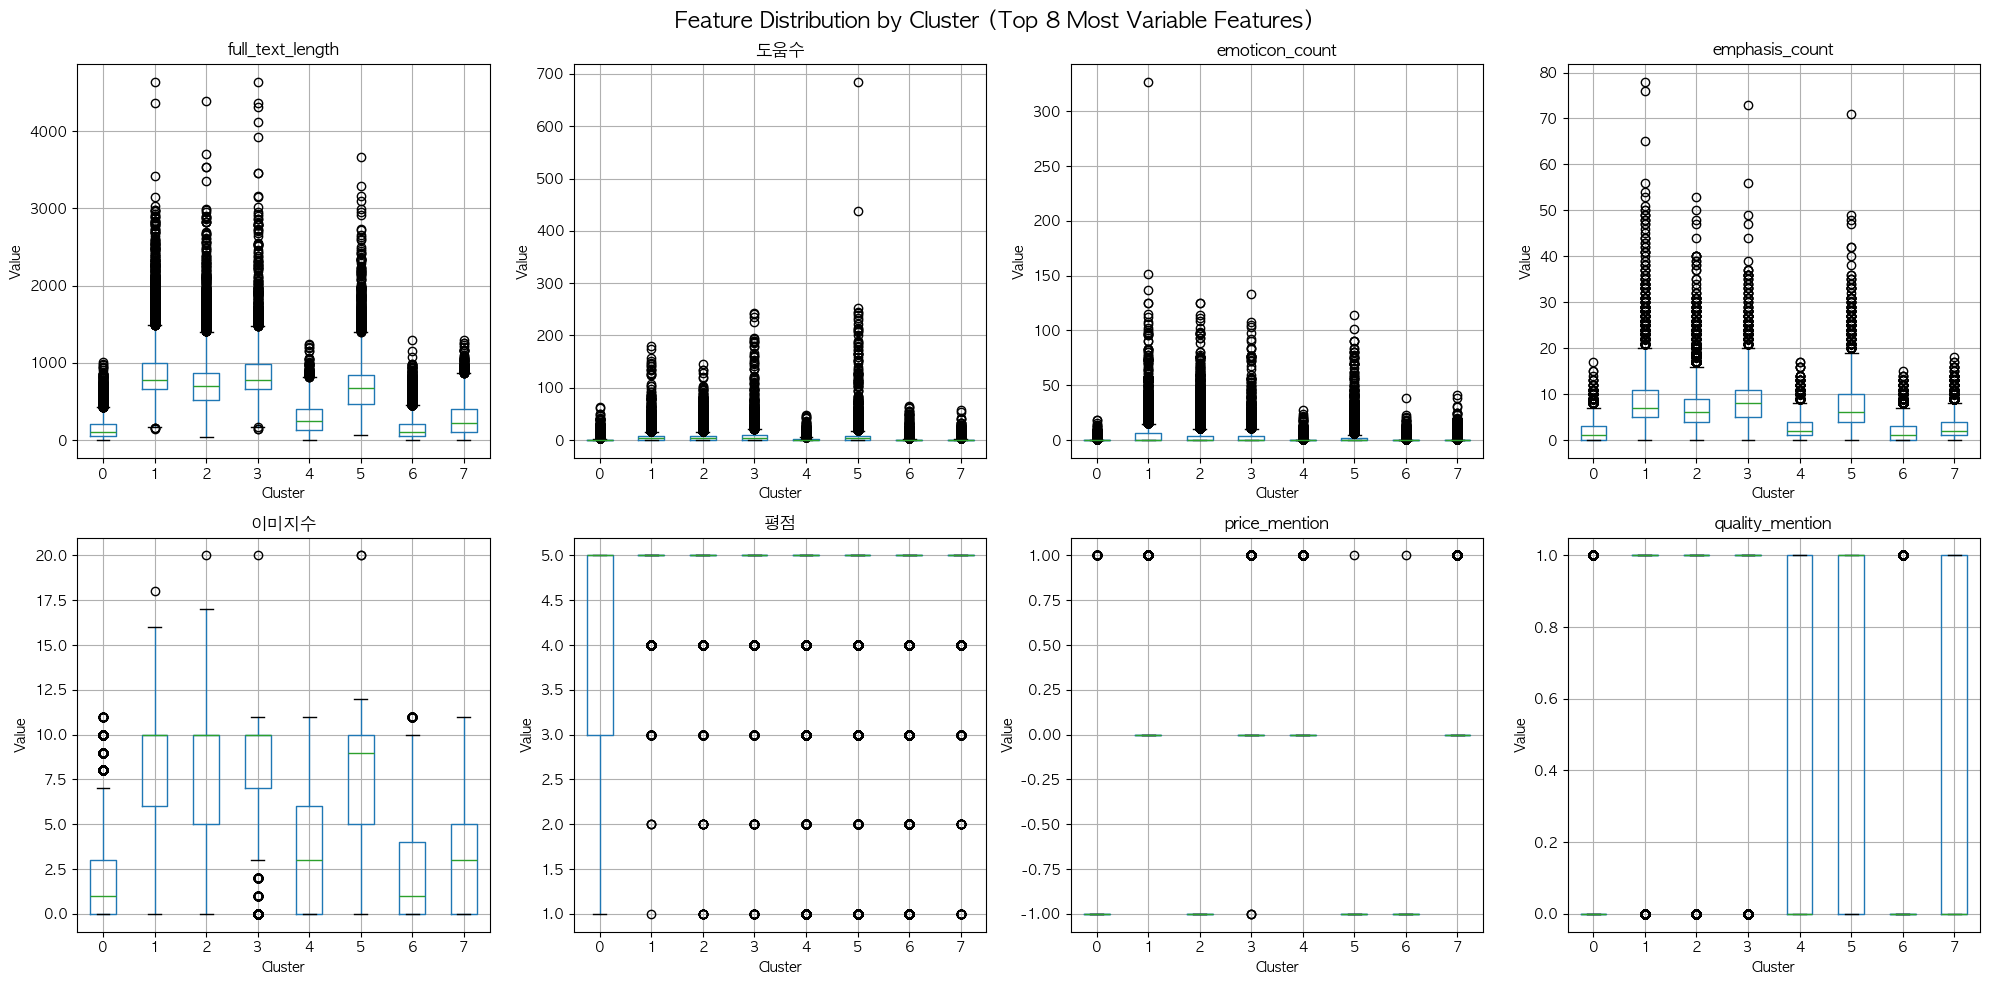


📋 4. 클러스터 요약 통계


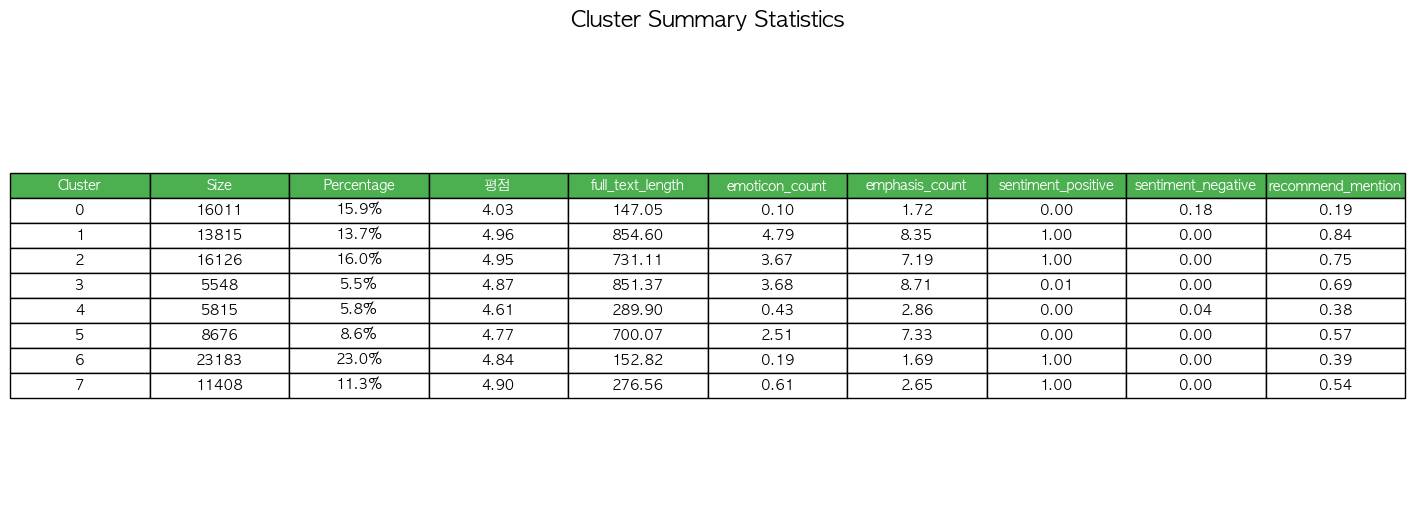


🔗 5. 병렬 좌표 플롯


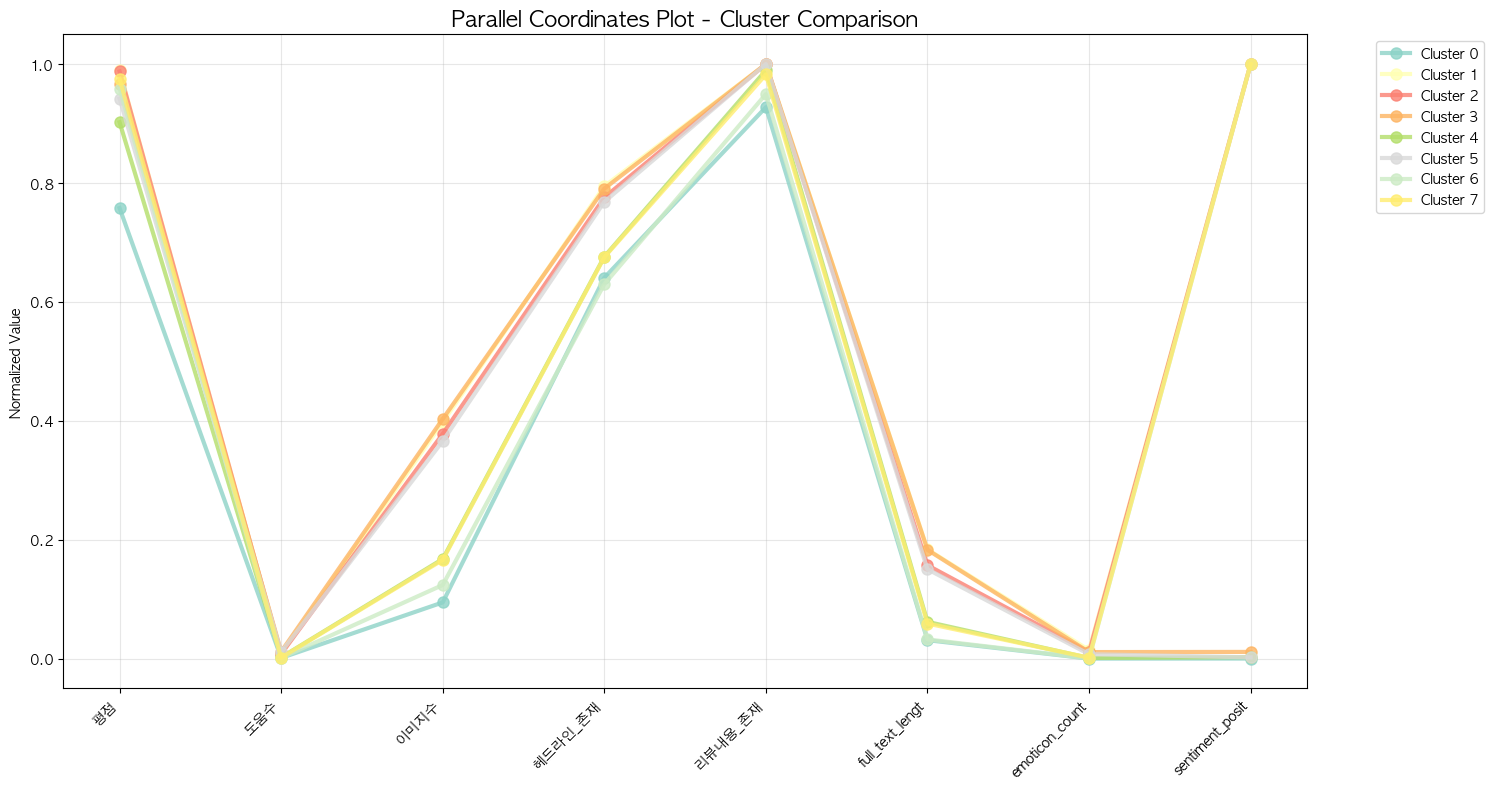


💡 6. 클러스터 특성 해석
클러스터 특성 분석

🔍 클러스터 0 (n=16011, 15.9%)
----------------------------------------
평점: 평균 4.03, 분포 {1: np.int64(2053), 2: np.int64(853), 3: np.int64(1375), 4: np.int64(1987), 5: np.int64(9743)}
감정: 긍정 0.0%, 부정 17.8%, 중립 82.2%
행동: recommend 18.8%, repurchase 8.9%, delivery 15.1%
텍스트: 평균 147자
강조표현: 평균 1.7개

🔍 클러스터 1 (n=13815, 13.7%)
----------------------------------------
평점: 평균 4.96, 분포 {1: np.int64(1), 2: np.int64(3), 3: np.int64(46), 4: np.int64(475), 5: np.int64(13290)}
감정: 긍정 100.0%, 부정 0.0%, 중립 0.0%
행동: recommend 84.2%, repurchase 44.4%, delivery 68.7%
텍스트: 평균 855자
강조표현: 평균 8.4개

🔍 클러스터 2 (n=16126, 16.0%)
----------------------------------------
평점: 평균 4.95, 분포 {1: np.int64(10), 2: np.int64(9), 3: np.int64(74), 4: np.int64(584), 5: np.int64(15449)}
감정: 긍정 100.0%, 부정 0.0%, 중립 0.0%
행동: recommend 75.2%, repurchase 38.3%, delivery 62.5%
텍스트: 평균 731자
강조표현: 평균 7.2개

🔍 클러스터 3 (n=5548, 5.5%)
----------------------------------------
평점: 평균 4.87, 분포 {1: np.int64(24), 2: np.int6

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Polygon
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

def load_cluster_data(file_path='cluster_results_kmeans.csv'):
    """클러스터 데이터 로드"""
    df = pd.read_csv(file_path)
    print(f"데이터 크기: {df.shape}")
    print(f"클러스터 분포: {dict(df['cluster'].value_counts().sort_index())}")
    return df

def get_analysis_features(df):
    """분석할 피처 선택"""
    # 수치형 피처 선택 (텍스트, 식별자 제외)
    exclude_cols = ['상품명', '구매상품명', '헤드라인', '리뷰내용', 'full_text',
                   '구매자명', '작성일자', 'sentiment_label', 'cluster']

    numeric_cols = df.select_dtypes(include=[np.number]).columns
    feature_cols = [col for col in numeric_cols if col not in exclude_cols]

    return feature_cols

def create_cluster_heatmap(df, features):
    """클러스터별 피처 평균값 히트맵"""
    # 클러스터별 평균 계산
    cluster_stats = df.groupby('cluster')[features].mean()

    # 정규화 (0-1 스케일)
    cluster_stats_norm = (cluster_stats - cluster_stats.min()) / (cluster_stats.max() - cluster_stats.min())

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # 원본 값 히트맵
    sns.heatmap(cluster_stats, annot=True, fmt='.2f', cmap='RdYlBu_r',
                ax=ax1, cbar_kws={'label': 'Average Value'})
    ax1.set_title('Cluster Feature Averages (Original Values)')
    ax1.set_xlabel('Features')
    ax1.set_ylabel('Cluster')

    # 정규화된 값 히트맵
    sns.heatmap(cluster_stats_norm, annot=True, fmt='.2f', cmap='RdYlBu_r',
                ax=ax2, cbar_kws={'label': 'Normalized Value (0-1)'})
    ax2.set_title('Cluster Feature Averages (Normalized)')
    ax2.set_xlabel('Features')
    ax2.set_ylabel('Cluster')

    plt.tight_layout()
    plt.show()

    return cluster_stats

def create_radar_charts(df, features):
    """클러스터별 레이더 차트"""
    cluster_stats = df.groupby('cluster')[features].mean()

    # 정규화
    cluster_stats_norm = (cluster_stats - cluster_stats.min()) / (cluster_stats.max() - cluster_stats.min())

    n_clusters = len(cluster_stats)
    n_features = len(features)

    # 각도 계산
    angles = np.linspace(0, 2 * np.pi, n_features, endpoint=False).tolist()
    angles += angles[:1]  # 원형으로 닫기

    # 2x4 배치
    fig, axes = plt.subplots(2, 4, figsize=(20, 10), subplot_kw=dict(projection='polar'))
    axes = axes.flatten()

    colors = plt.cm.Set3(np.linspace(0, 1, n_clusters))

    for i, cluster in enumerate(cluster_stats_norm.index):
        ax = axes[i]
        values = cluster_stats_norm.loc[cluster].tolist()
        values += values[:1]  # 원형으로 닫기

        ax.plot(angles, values, 'o-', linewidth=2, label=f'Cluster {cluster}', color=colors[i])
        ax.fill(angles, values, alpha=0.25, color=colors[i])
        ax.set_ylim(0, 1)
        ax.set_title(f'Cluster {cluster}', size=14, weight='bold')
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels([feat[:10] for feat in features], size=8)
        ax.grid(True)

    plt.tight_layout()
    plt.show()

def create_feature_comparison(df, features):
    """주요 피처별 클러스터 비교 (박스플롯)"""
    # 주요 피처 선택 (분산이 큰 것들)
    feature_vars = df[features].var().sort_values(ascending=False)
    top_features = feature_vars.head(8).index.tolist()

    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()

    for i, feature in enumerate(top_features):
        ax = axes[i]
        df.boxplot(column=feature, by='cluster', ax=ax)
        ax.set_title(f'{feature}')
        ax.set_xlabel('Cluster')
        ax.set_ylabel('Value')

    plt.suptitle('Feature Distribution by Cluster (Top 8 Most Variable Features)', size=16)
    plt.tight_layout()
    plt.show()

def create_cluster_summary_table(df, features):
    """클러스터별 요약 통계 테이블"""
    summary_data = []

    for cluster in sorted(df['cluster'].unique()):
        cluster_data = df[df['cluster'] == cluster]

        summary = {
            'Cluster': cluster,
            'Size': len(cluster_data),
            'Percentage': f"{len(cluster_data)/len(df)*100:.1f}%"
        }

        # 주요 피처 평균값
        key_features = ['평점', 'full_text_length', 'emoticon_count', 'emphasis_count',
                       'sentiment_positive', 'sentiment_negative', 'recommend_mention']

        for feat in key_features:
            if feat in cluster_data.columns:
                summary[feat] = f"{cluster_data[feat].mean():.2f}"

        summary_data.append(summary)

    summary_df = pd.DataFrame(summary_data)

    # 테이블 시각화
    fig, ax = plt.subplots(figsize=(15, 6))
    ax.axis('tight')
    ax.axis('off')

    table = ax.table(cellText=summary_df.values,
                    colLabels=summary_df.columns,
                    cellLoc='center',
                    loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.5)

    # 헤더 스타일
    for i in range(len(summary_df.columns)):
        table[(0, i)].set_facecolor('#4CAF50')
        table[(0, i)].set_text_props(weight='bold', color='white')

    plt.title('Cluster Summary Statistics', size=16, weight='bold', pad=20)
    plt.show()

    return summary_df

def create_parallel_coordinates(df, features):
    """병렬 좌표 플롯"""
    # 주요 피처만 선택 (너무 많으면 복잡함)
    selected_features = features[:8] if len(features) > 8 else features

    # 데이터 정규화
    plot_data = df[selected_features + ['cluster']].copy()
    for feat in selected_features:
        plot_data[feat] = (plot_data[feat] - plot_data[feat].min()) / (plot_data[feat].max() - plot_data[feat].min())

    # 클러스터별 평균 계산
    cluster_means = plot_data.groupby('cluster')[selected_features].mean()

    fig, ax = plt.subplots(figsize=(15, 8))

    colors = plt.cm.Set3(np.linspace(0, 1, len(cluster_means)))

    for i, (cluster, values) in enumerate(cluster_means.iterrows()):
        ax.plot(range(len(selected_features)), values, 'o-',
                linewidth=3, markersize=8, label=f'Cluster {cluster}',
                color=colors[i], alpha=0.8)

    ax.set_xticks(range(len(selected_features)))
    ax.set_xticklabels([feat[:15] for feat in selected_features], rotation=45, ha='right')
    ax.set_ylabel('Normalized Value')
    ax.set_title('Parallel Coordinates Plot - Cluster Comparison', size=16, weight='bold')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def analyze_cluster_characteristics(df):
    """클러스터 특성 분석 및 해석"""
    print("="*60)
    print("클러스터 특성 분석")
    print("="*60)

    for cluster in sorted(df['cluster'].unique()):
        cluster_data = df[df['cluster'] == cluster]
        print(f"\n🔍 클러스터 {cluster} (n={len(cluster_data)}, {len(cluster_data)/len(df)*100:.1f}%)")
        print("-" * 40)

        # 평점 특성
        if '평점' in cluster_data.columns:
            avg_rating = cluster_data['평점'].mean()
            rating_dist = cluster_data['평점'].value_counts().sort_index()
            print(f"평점: 평균 {avg_rating:.2f}, 분포 {dict(rating_dist)}")

        # 감정 특성
        sentiment_cols = ['sentiment_positive', 'sentiment_negative', 'sentiment_neutral']
        if all(col in cluster_data.columns for col in sentiment_cols):
            pos_rate = cluster_data['sentiment_positive'].mean()
            neg_rate = cluster_data['sentiment_negative'].mean()
            neu_rate = cluster_data['sentiment_neutral'].mean()
            print(f"감정: 긍정 {pos_rate:.1%}, 부정 {neg_rate:.1%}, 중립 {neu_rate:.1%}")

        # 행동 특성
        behavior_cols = ['recommend_mention', 'repurchase_mention', 'delivery_mention']
        behavior_rates = {}
        for col in behavior_cols:
            if col in cluster_data.columns:
                behavior_rates[col.replace('_mention', '')] = cluster_data[col].mean()

        if behavior_rates:
            print(f"행동: " + ", ".join([f"{k} {v:.1%}" for k, v in behavior_rates.items()]))

        # 텍스트 특성
        if 'full_text_length' in cluster_data.columns:
            avg_length = cluster_data['full_text_length'].mean()
            print(f"텍스트: 평균 {avg_length:.0f}자")

        if 'emphasis_count' in cluster_data.columns:
            avg_emphasis = cluster_data['emphasis_count'].mean()
            print(f"강조표현: 평균 {avg_emphasis:.1f}개")

def main_cluster_analysis(file_path='cluster_results_kmeans.csv'):
    """메인 클러스터 분석 함수"""

    print("🔍 클러스터별 피처 분석 시작")
    print("="*50)

    # 1. 데이터 로드
    df = load_cluster_data(file_path)

    # 2. 분석 피처 선택
    features = get_analysis_features(df)
    print(f"\n분석 피처 ({len(features)}개): {features}")

    # 3. 히트맵 시각화
    print("\n📊 1. 클러스터별 피처 평균 히트맵")
    cluster_stats = create_cluster_heatmap(df, features)

    # 4. 레이더 차트
    print("\n🎯 2. 클러스터별 레이더 차트")
    create_radar_charts(df, features)

    # 5. 박스플롯 비교
    print("\n📈 3. 주요 피처 분포 비교")
    create_feature_comparison(df, features)

    # 6. 요약 테이블
    print("\n📋 4. 클러스터 요약 통계")
    summary_df = create_cluster_summary_table(df, features)

    # 7. 병렬 좌표 플롯
    print("\n🔗 5. 병렬 좌표 플롯")
    create_parallel_coordinates(df, features)

    # 8. 특성 분석
    print("\n💡 6. 클러스터 특성 해석")
    analyze_cluster_characteristics(df)

    return cluster_stats, summary_df

# 실행
cluster_stats, summary_df = main_cluster_analysis('cluster_results_kmeans.csv')